# 개인 분석
1. 범주형 변수에 대해 동질성 검정(카이제곱 교차분석)
    1. ~장애등록여부(disabled)에 따라 어려움(difficulty)에 차이가 있는가?~
    1. ~연령(age)에 따라 어려움(difficulty)에 차이가 있는가?~
    1. 연령(age)에 따라 지출하는 항목(expense)에 차이가 있는가?
    1. 연령(age)에 따라 지출할 항목(expense_f)에 차이가 있는가?
2. 범주형 변수의 카테고리 별 target 평균 비교 분석(anova)
    1. 연령(age), 학력(education), 종사상지위(work), 가구소득(income), 시도(sido) 별 문화예술행사 관람 횟수(view_cnt)의 평균에 차이가 있는가?

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

## 데이터 로드

In [4]:
CS = pd.read_csv('./data/CS.csv')

In [5]:
CS.head()
CS.info()

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

## ~1-A. 장애등록여부(disabled)에 따라 어려움(difficulty)에 차이가 있는가?~

In [6]:
# 사용할 column 정의
using_column_names = ['disabled', 'difficulty']

# 분석에 사용할 df 정의
CS_an = CS[using_column_names]

[Text(0.5, 1.0, 'disabled')]

[Text(0.5, 1.0, 'difficulty')]

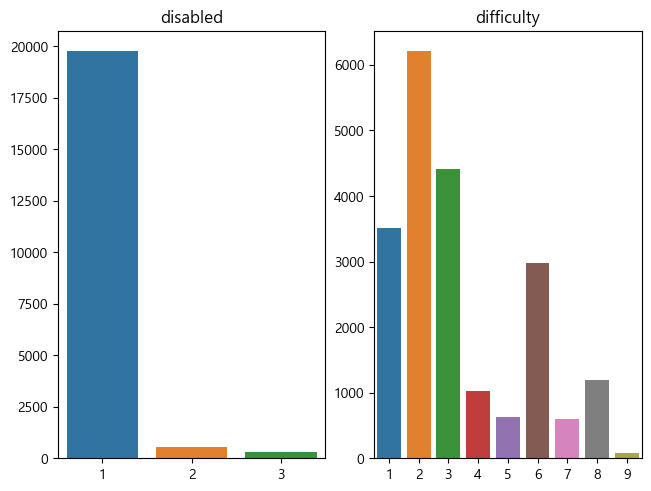

In [7]:
plt.rc('font', family='Malgun Gothic')

srow = 1
scol = 2

fig, axis = plt.subplots(srow, scol, constrained_layout=True)

for i, column in enumerate(using_column_names):
    sns.barplot(
        x = CS_an[column].value_counts().index, 
        y = CS_an[column].value_counts().values,
        ax = axis[i],
    ).set(title=column)
    
plt.show()

# 장애등록여부는
# 해당사항없음(1)이 대다수
# 미등록(2)이 2번째
# 장애등록(3)이 제일 적었다.

# 문화행사 참여 시 가장 큰 어려움은
# 시간이 좀처럼 나지 않는다(2)
# 관심 있는 프로그램이 없다(3)
# 비용이 많이 든다(1)
# 관련정보가 부족하다(6)
# 순으로 나타났다

In [8]:
# 장애등록여부에 따른 데이터 개수 출력
len(CS_an['disabled'][CS_an['disabled'] == 1])
len(CS_an['disabled'][CS_an['disabled'] == 2])
len(CS_an['disabled'][CS_an['disabled'] == 3])

19772

532

320

[Text(0.5, 1.0, '해당사항없음')]

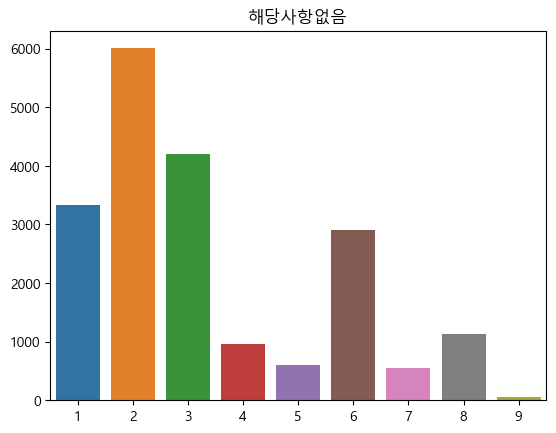

[Text(0.5, 1.0, '미등록')]

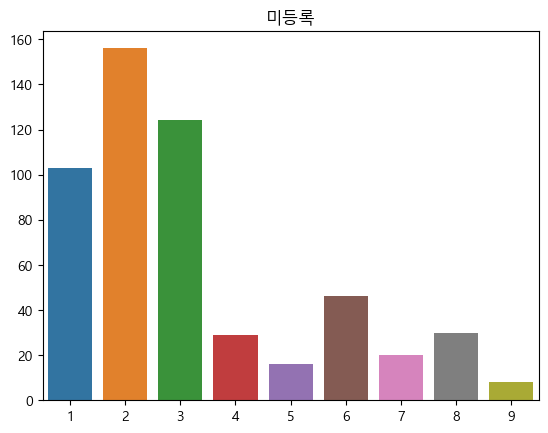

[Text(0.5, 1.0, '장애등록')]

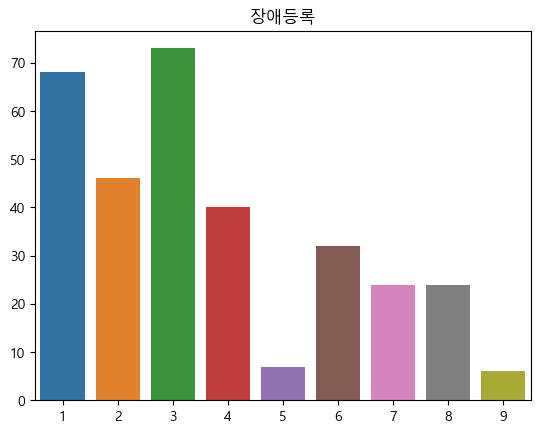

In [9]:
plt.rc('font', family='Malgun Gothic')

sns.barplot(
    x = CS_an['difficulty'][CS_an['disabled'] == 1].value_counts().index, 
    y = CS_an['difficulty'][CS_an['disabled'] == 1].value_counts().values,
).set(title='해당사항없음')
plt.show()
# 장애등록에 해당되지 않는 사람이 대부분이기 때문에
# 전체 집단의 분포와 동일하게 나타난다.

sns.barplot(
    x = CS_an['difficulty'][CS_an['disabled'] == 2].value_counts().index, 
    y = CS_an['difficulty'][CS_an['disabled'] == 2].value_counts().values,
).set(title='미등록')
plt.show()
# 장애등록을 미등록한 경우 또한 마찬가지이다.

sns.barplot(
    x = CS_an['difficulty'][CS_an['disabled'] == 3].value_counts().index, 
    y = CS_an['difficulty'][CS_an['disabled'] == 3].value_counts().values,
).set(title='장애등록')
plt.show()
# 장애등록을 한 경우,
# 가장 높은 응답 비율을 보였던 '시간이 좀처럼 나지 않는다'(2) 이 3위로 나타나고,
# '관심 있는 프로그램이 없다'(3), '비용이 많이 든다'(1) 이 각각 1, 2위로 나타났다.
# 또한 '교통이 불편하다'(4)는 답변이 4위였다.

- 해당사항없음 집단과 미등록 집단은 분포가 거의 비슷하므로, 한 집단으로 묶는다.
- 해당사항없거나 미등록 집단과 장애들록을 한 집단에 대해
- 문화행사 참여 시 가장 큰 어려운 부분에 차이가 존재하는지
- 카이제곱 교차분석의 한 가지인 동질성 검정을 실시한다.

#### 해당사항없음과 미등록 집단 묶기

In [10]:
disabled_range = {'disabled' : {1:1, 2:1, 3:2}}
CS_an_replace = CS_an.replace(disabled_range)
CS_an_replace['disabled'].value_counts()

1    20304
2      320
Name: disabled, dtype: int64

[Text(0.5, 1.0, '해당사항없음 & 미등록')]

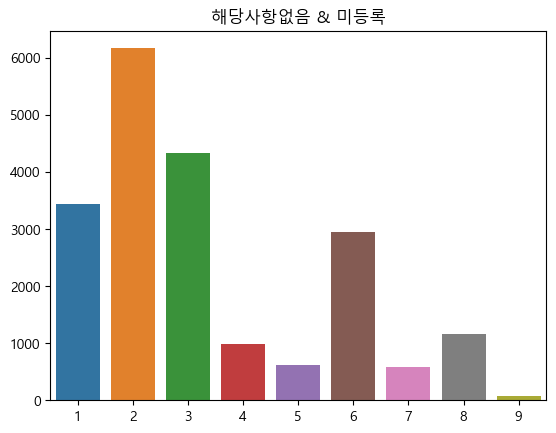

[Text(0.5, 1.0, '장애등록')]

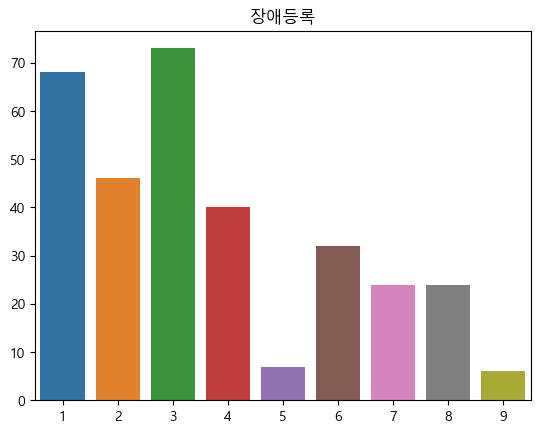

In [11]:
# 묶은 집단으로 다시 barplot 출력
plt.rc('font', family='Malgun Gothic')

sns.barplot(
    x = CS_an_replace['difficulty'][CS_an_replace['disabled'] == 1].value_counts().index, 
    y = CS_an_replace['difficulty'][CS_an_replace['disabled'] == 1].value_counts().values,
).set(title='해당사항없음 & 미등록')
plt.show()

sns.barplot(
    x = CS_an_replace['difficulty'][CS_an_replace['disabled'] == 2].value_counts().index, 
    y = CS_an_replace['difficulty'][CS_an_replace['disabled'] == 2].value_counts().values,
).set(title='장애등록')
plt.show()

#### pivot 테이블 생성

In [12]:
# 장애 등록 여부에 따라 데이터 개수 출력
len(CS_an_replace['disabled'][CS_an_replace['disabled'] == 1])
len(CS_an_replace['disabled'][CS_an_replace['disabled'] == 2])

# 각 범주 간 차이가 너무 많이 남

20304

320

In [13]:
# 장애등록여부에 따라 표본 수를 같게 하기 위한 작업
# disabled=2인 경우
CS_an_replace_dis2 = CS_an_replace[CS_an_replace['disabled'] == 2]

# disabled=1인 경우
len_2 = len(CS_an_replace_dis2)
CS_an_replace_dis1 = CS_an_replace[CS_an_replace['disabled'] == 1].sample(n=len_2,
                                                     random_state=0,
                                                    )

# 병합
CS_an_replace_sample = pd.concat([CS_an_replace_dis1, CS_an_replace_dis2], axis=0)

In [14]:
CS_an_replace_piv = pd.DataFrame()

for i in range(1, 3):
    for j in range(1, 10):
        count_v = CS_an_replace_sample[(CS_an_replace_sample['disabled'] == i) & (CS_an_replace_sample['difficulty'] == j)].count()[0]
        
        record = pd.DataFrame({
            'disabled' : [i],
            'difficulty' : [j],
            'count' : [count_v],
        })
        
        CS_an_replace_piv = pd.concat([CS_an_replace_piv, record], axis=0)

In [15]:
CS_an_replace_piv = CS_an_replace_piv.pivot(index='disabled', columns='difficulty', values='count')

In [16]:
CS_an_replace_piv

difficulty,1,2,3,4,5,6,7,8,9
disabled,,,,,,,,,
1,49,114,62,14,9,42,11,16,3
2,68,46,73,40,7,32,24,24,6


#### 카이제곱 검정 수행
- 동질성 검정
- H0 : 장애등록을 한 사람과 하지 않은 사람은 문화행사 참여 시 가장 큰 어려운 점의 선택 비율은 모두 같다.
- H1 : 장애등록을 한 사람과 하지 않은 사람은 문화행사 참여 시 가장 큰 어려운 점의 선택 비율은 모두 같지는 않다. (적어도 하나는 다르다.)

In [17]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(CS_an_replace_piv)

print('p-value : {0:.4f}'.format(pvalue))

# p-value가 0으로 유의수준 5% 에서 유의한 결과를 얻습니다.
# 따라서 대립가설을 채택합니다.

p-value : 0.0000


## ~2-B. 연령(age)에 따라 어려움(difficulty)에 차이가 있는가?~

In [18]:
# 사용할 column 정의
using_column_names = ['age', 'difficulty']

# 분석에 사용할 df 정의
CS_an = CS[using_column_names]

[Text(0.5, 1.0, 'age')]

[Text(0.5, 1.0, 'difficulty')]

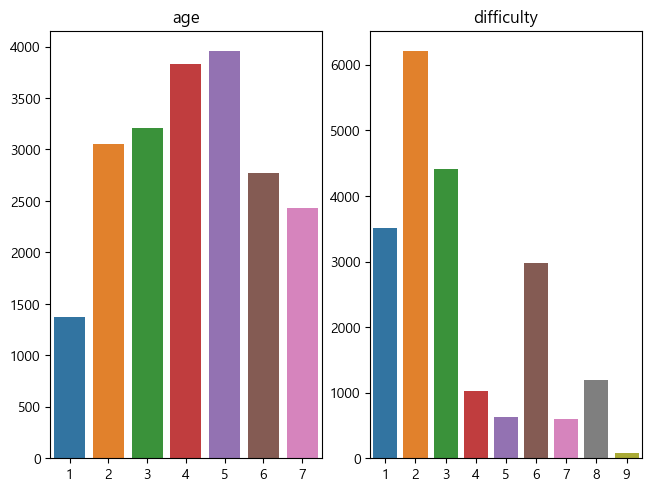

In [19]:
plt.rc('font', family='Malgun Gothic')

srow = 1
scol = 2

fig, axis = plt.subplots(srow, scol, constrained_layout=True)

for i, column in enumerate(using_column_names):
    sns.barplot(
        x = CS_an[column].value_counts().index, 
        y = CS_an[column].value_counts().values,
        ax = axis[i],
    ).set(title=column)
    
plt.show()

# 연령대는
# 4~50대가 가장 많으며
# 2~30대가 그 다음이었다.

# 문화행사 참여 시 가장 큰 어려움은
# 위와 마찬가지로
# 시간이 좀처럼 나지 않는다(2)
# 관심 있는 프로그램이 없다(3)
# 비용이 많이 든다(1)
# 관련정보가 부족하다(6)
# 순으로 나타났다

In [20]:
# 연령에 따른 데이터 개수 출력
for i in range(1, 8):
    print(i*10, '대 :', len(CS_an['age'][CS_an['age'] == i]))

10 대 : 1369
20 대 : 3054
30 대 : 3206
40 대 : 3834
50 대 : 3956
60 대 : 2771
70 대 : 2434


[Text(0.5, 1.0, '10대')]

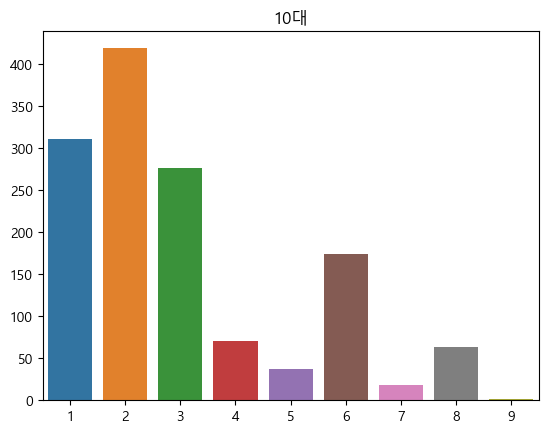

[Text(0.5, 1.0, '20대')]

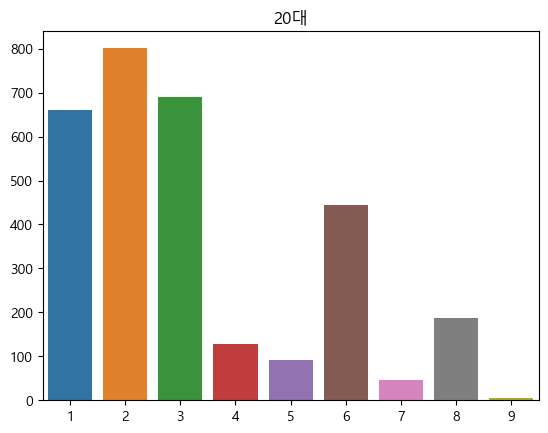

[Text(0.5, 1.0, '30대')]

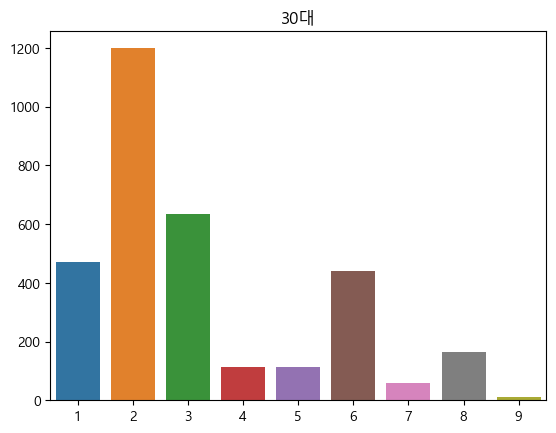

[Text(0.5, 1.0, '40대')]

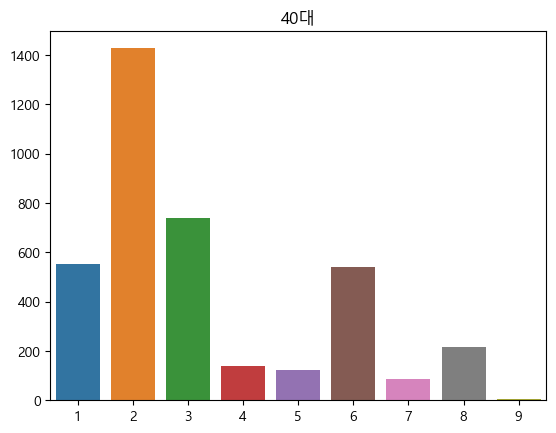

[Text(0.5, 1.0, '50대')]

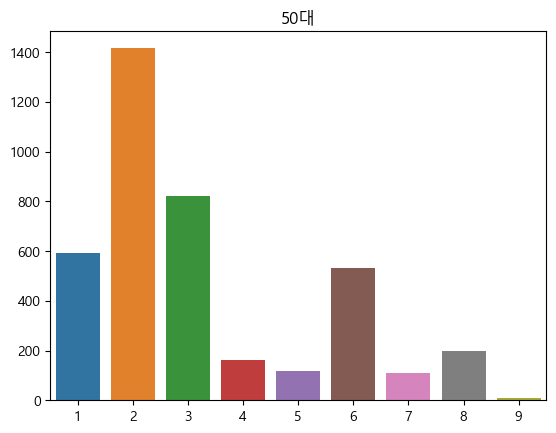

[Text(0.5, 1.0, '60대')]

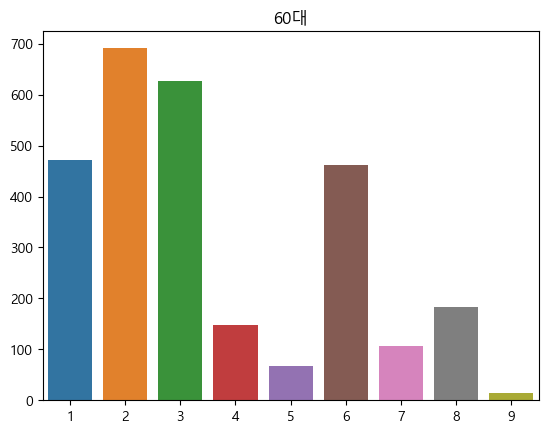

[Text(0.5, 1.0, '70대')]

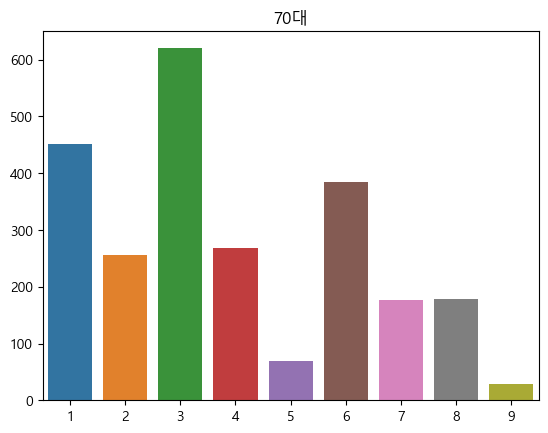

In [21]:
# 연령별 어려움 빈도 barplot
for i in range(1, 8):
    sns.barplot(
        x = CS_an['difficulty'][CS_an['age'] == i].value_counts().index, 
        y = CS_an['difficulty'][CS_an['age'] == i].value_counts().values,
    ).set(title=(str(i * 10) + '대'))

    plt.show()

# 전체적으로 '시간이 나지 않아서'(2) 가 최대 원인인 경우가 많다.
# 3~50대의 경우 다른 선택지에 비해 더 도드라진다.

# 30대에서 나이를 먹을수록 
# '비용이 많이 든다'(1)와
# '관심 있는 프로그램이 없다'(3),
# '관련정보가 부족하다'(6),
# '함께 갈 사람이 없다'(7)
# 에 대한 답변 비율이 높아진지며,

# 5~60대의 나이대와 다른 나이대가 비교되는 답변은
# 3, 6, 7번으로 보인다.

[Text(0.5, 1.0, '10대')]

[Text(0.5, 1.0, '20대')]

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

[Text(0.5, 1.0, '70대')]

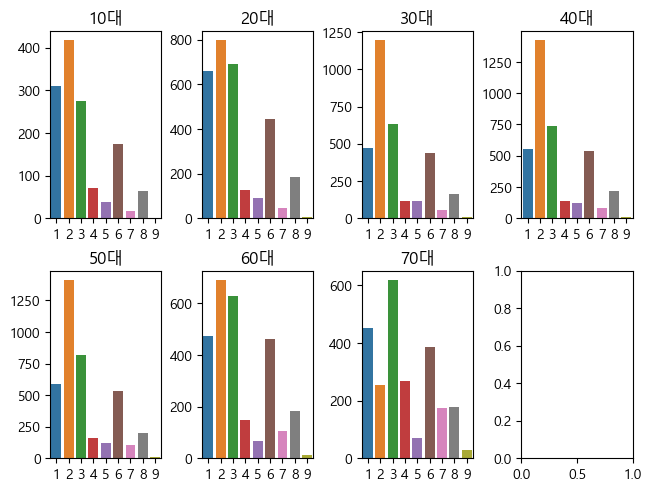

In [22]:
plt.rc('font', family='Malgun Gothic')

_r = 2
_c = 4

fig, axis = plt.subplots(_r, _c, constrained_layout=True)

for i in range(1, 8):
    sns.barplot(
        x = CS_an['difficulty'][CS_an['age'] == i].value_counts().index, 
        y = CS_an['difficulty'][CS_an['age'] == i].value_counts().values,
        ax=axis[(i-1)//_c, (i-1)%_c],
    ).set(title=(str(i * 10) + '대'))

plt.show()

# 전체적으로 '시간이 나지 않아서'(2) 가 최대 원인인 경우가 많다.
# 3~50대의 경우 다른 선택지에 비해 더 도드라진다.

# 30대에서 나이를 먹을수록 
# '비용이 많이 든다'(1)와
# '관심 있는 프로그램이 없다'(3),
# '관련정보가 부족하다'(6),
# '함께 갈 사람이 없다'(7)
# 에 대한 답변 비율이 높아진지며,

# 5~60대의 나이대와 다른 나이대가 비교되는 답변은
# 3, 6, 7번으로 보인다.

- 해당사항없음 집단과 미등록 집단은 분포가 거의 비슷하므로, 한 집단으로 묶는다.
- 해당사항없거나 미등록 집단과 장애들록을 한 집단에 대해
- 문화행사 참여 시 가장 큰 어려운 부분에 차이가 존재하는지
- 카이제곱 교차분석의 한 가지인 동질성 검정을 실시한다.

#### 1\~20대, 3\~40대, 5\~60대, 70대 이상으로 묶기

In [23]:
age_range = {'age' : {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4}}
CS_an_replace = CS_an.replace(age_range)
CS_an_replace['age'].value_counts().sort_index()

1    4423
2    7040
3    6727
4    2434
Name: age, dtype: int64

In [24]:
# 묶은 집단으로 다시 barplot 출력
titles = ['1~20대', '3~40대', '5~60대', '70대 이상']

for i in range(1, 5):
    sns.barplot(
        x = CS_an_replace['difficulty'][CS_an_replace['age'] == i].value_counts().index, 
        y = CS_an_replace['difficulty'][CS_an_replace['age'] == i].value_counts().values,
        ax=axis[(i-1)//_c, (i-1)%_c],
    ).set(title=titles[i-1])

    plt.show()

# 1~20대의 경우,
# 시간도 없지만
# 비용과 관심을 끄는 프로그램의 부재가 큰 이유로 꼽힌다.

# 3~40대와 5~60대의 경우,
# 직장 생활을 하는 사람이 많아 비슷한 분포를 보인다.
# 주로 시간이 없는 것으로 보인다.

# 70대 이상의 경우,
# 은퇴를 할 시기라서 시간 문제는 줄어들지만,
# 관심을 끄는 프로그램의 부재, 비용 등 다양한 이유가 존재한다.

[Text(0.5, 1.0, '1~20대')]

[Text(0.5, 1.0, '3~40대')]

[Text(0.5, 1.0, '5~60대')]

[Text(0.5, 1.0, '70대 이상')]

[Text(0.5, 1.0, '1~20대')]

[Text(0.5, 1.0, '3~40대')]

[Text(0.5, 1.0, '5~60대')]

[Text(0.5, 1.0, '70대 이상')]

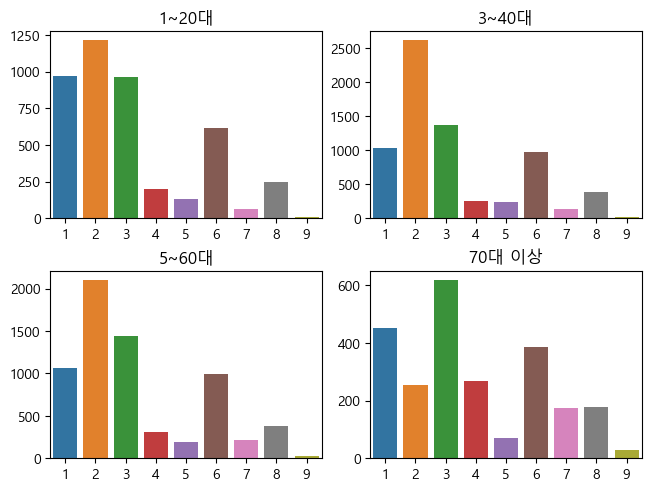

In [25]:
# 묶은 집단으로 다시 barplot 출력

plt.rc('font', family='Malgun Gothic')

_r = 2
_c = 2
titles = ['1~20대', '3~40대', '5~60대', '70대 이상']

fig, axis = plt.subplots(_r, _c, constrained_layout=True)

for i in range(1, 5):
    sns.barplot(
        x = CS_an_replace['difficulty'][CS_an_replace['age'] == i].value_counts().index, 
        y = CS_an_replace['difficulty'][CS_an_replace['age'] == i].value_counts().values,
        ax=axis[(i-1)//_c, (i-1)%_c],
    ).set(title=titles[i-1])

plt.show()

# 1~20대의 경우,
# 시간도 없지만
# 비용과 관심을 끄는 프로그램의 부재가 큰 이유로 꼽힌다.

# 3~40대와 5~60대의 경우,
# 직장 생활을 하는 사람이 많아 비슷한 분포를 보인다.
# 주로 시간이 없는 것으로 보인다.

# 70대 이상의 경우,
# 은퇴를 할 시기라서 시간 문제는 줄어들지만,
# 관심을 끄는 프로그램의 부재, 비용 등 다양한 이유가 존재한다.

#### pivot 테이블 생성

In [26]:
# 연령에 따른 데이터 개수 다시 출력
titles = ['1~20대', '3~40대', '5~60대', '70대 이상']
for i in range(1, 5):
    print(titles[i-1], len(CS_an_replace['age'][CS_an_replace['age'] == i]))

# 1~20대와 70대 이상이 적음

1~20대 4423
3~40대 7040
5~60대 6727
70대 이상 2434


In [27]:
# 연령에 따라 표본 수를 같게 하기 위한 작업
# 70대를 기준으로 sampling
# age=4인 경우
CS_an_replace_age4 = CS_an_replace[CS_an_replace['age'] == 4]

len_4 = len(CS_an_replace_age4)
# age=3, 2, 1인 경우
CS_an_replace_age3 = CS_an_replace[CS_an_replace['age'] == 3].sample(n=len_4,
                                                     random_state=0,
                                                    )
CS_an_replace_age2 = CS_an_replace[CS_an_replace['age'] == 2].sample(n=len_4,
                                                     random_state=0,
                                                    )
CS_an_replace_age1 = CS_an_replace[CS_an_replace['age'] == 1].sample(n=len_4,
                                                     random_state=0,
                                                    )

# 병합
CS_an_replace_sample = pd.concat([CS_an_replace_age1, CS_an_replace_age2, CS_an_replace_age3, CS_an_replace_age4], axis=0)

In [28]:
CS_an_replace_piv = pd.DataFrame()

for i in range(1, 5):
    for j in range(1, 10):
        count_v = CS_an_replace_sample[(CS_an_replace_sample['age'] == i) & (CS_an_replace_sample['difficulty'] == j)].count()[0]
        
        record = pd.DataFrame({
            'age' : [i],
            'difficulty' : [j],
            'count' : [count_v],
        })
        
        CS_an_replace_piv = pd.concat([CS_an_replace_piv, record], axis=0)

In [29]:
CS_an_replace_piv = CS_an_replace_piv.pivot(index='age', columns='difficulty', values='count')

In [30]:
CS_an_replace_piv

difficulty,1,2,3,4,5,6,7,8,9
age,,,,,,,,,
1,533,660,513,113,73,366,33,139,4
2,338,908,488,90,66,356,42,139,7
3,378,807,503,118,72,349,76,121,10
4,452,256,620,269,70,385,176,178,28


#### 카이제곱 검정 수행
- 동질성 검정
- H0 : 연령 별로 문화행사 참여 시 가장 큰 어려운 점의 선택 비율은 모두 같다.
- H1 : 연령 별로 문화행사 참여 시 가장 큰 어려운 점의 선택 비율은 모두 같지는 않다. (적어도 하나는 다르다.)

In [31]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(CS_an_replace_piv)

print('p-value : {0:.4f}'.format(pvalue))

# p-value가 0으로 유의수준 5% 에서 유의한 결과를 얻습니다.
# 따라서 대립가설을 채택합니다.

p-value : 0.0000


## 1-C. 연령(age)에 따라 지출한 항목(expense)에 차이가 있는가?
- 연령
- 문화예술 관련 많이 지출하는 항목

In [32]:
# 사용할 column 정의
using_column_names = ['age', 'expense']

# 분석에 사용할 df 정의
CS_an = CS[using_column_names]

# 해당사항 없음, 모름/무응답 제외
CS_visual = CS_an[CS_an[using_column_names[1]] != 17]

[Text(0.5, 1.0, 'age')]

[Text(0.5, 1.0, 'expense')]

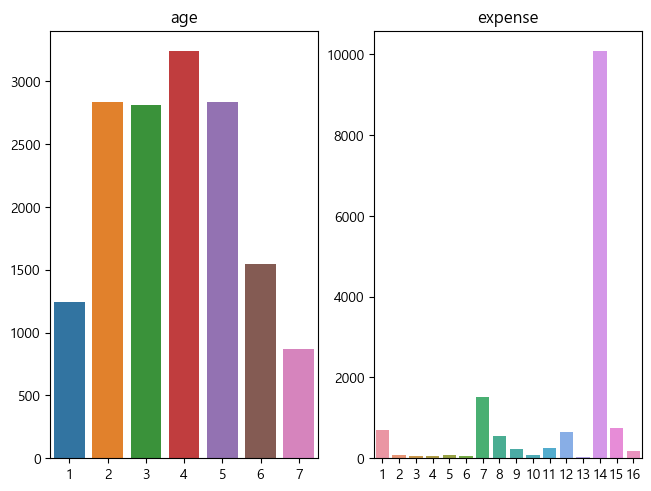

In [33]:
plt.rc('font', family='Malgun Gothic')

srow = 1
scol = 2

fig, axis = plt.subplots(srow, scol, constrained_layout=True)

for i, column in enumerate(using_column_names):
    sns.barplot(
        x = CS_visual[column].value_counts().index, 
        y = CS_visual[column].value_counts().values,
        ax = axis[i],
    ).set(title=column)
    
plt.show()

# 연령대는
# 4~50대가 가장 많으며
# 2~30대가 그 다음이었다.

# 문화예술 관련 많이 지출하는 항목은
# 1순위가 영화 관람(14)으로 가장 높으며 다른 답변과 큰 차이를 보였으며,
# 2순위는 영화 대여(7),
# 그 다음으로는 방송 프로그램/콘서트 관람(15), 
# 연극/뮤지컬 관람(12),
# 문학 작품 대여(1) 였다.

In [34]:
# age 코드명
age_code_names = {
    1 : '15세 이상',
    2 : '20대',
    3 : '30대',
    4 : '40대',
    5 : '50대',
    6 : '60대',
    7 : '70대 이상',
}

In [35]:
# expense, expense_f 코드명
expense_code_names = {
    1 : '문학 작품 대여',
    2 : '미술 ',
    3 : '서양음악 관련 대여',
    4 : '전통예술 대여',
    5 : '연극/뮤지컬 대여',
    6 : '무용 대여',
    7 : '영화 대여',
    8 : '대중예술/음악 대여',
    9 : '각종 전시회 관람',
    10 : '서양음악 관련 관람',
    11 : '전통예술 관람',
    12 : '연극/뮤지컬 관람',
    13 : '무용 관람',
    14 : '영화 관람',
    15 : '대중예술/음악 관람',
    16 : '대여/관람 제외 기타 활동',
}

In [36]:
# 연령에 따른 데이터 개수 출력
print('15세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 1]))
for i in range(2, 7):
    print(i*10, '    대 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == i]))
print('70세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 7]))

15세 이상 : 1246
20     대 : 2835
30     대 : 2811
40     대 : 3241
50     대 : 2837
60     대 : 1550
70세 이상 : 871


### 연령별 지출하는 항목 barplot

[Text(0.5, 1.0, '15세 이상')]

[Text(0.5, 1.0, '20대')]

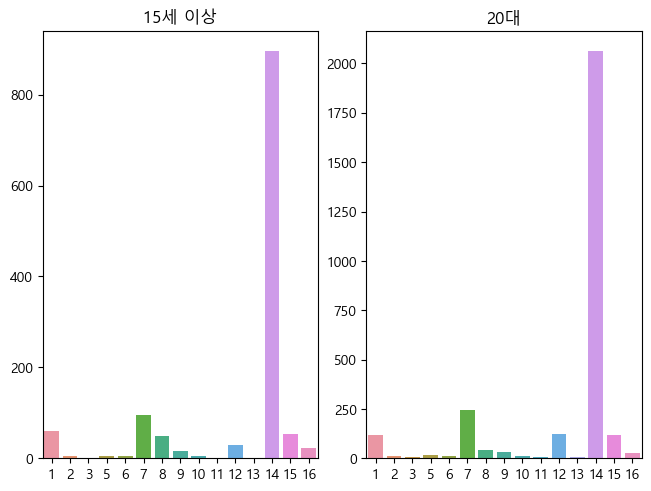

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

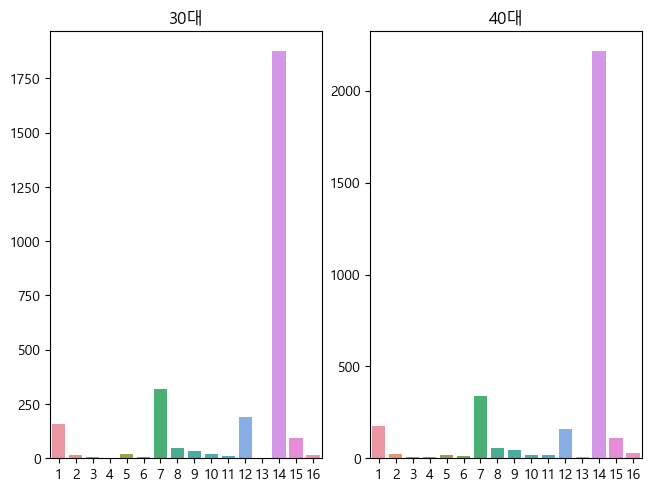

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

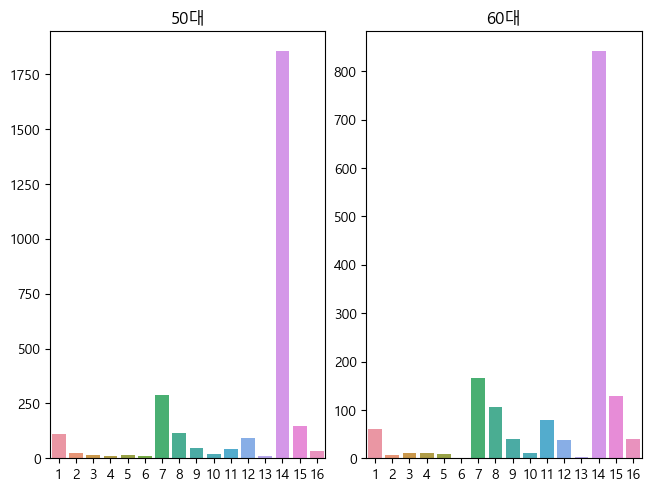

[Text(0.5, 1.0, '70대 이상')]

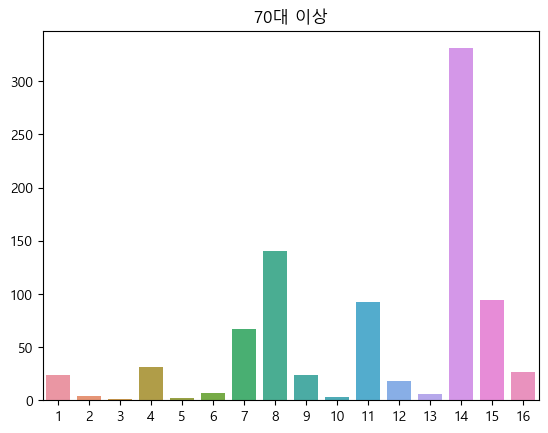

In [37]:
# 연령별 지출하는 항목 barplot
plt.rc('font', family='Malgun Gothic')

_r = 1  # 행
_c = 2  # 열

for i in range(3):
    fig, axis = plt.subplots(_r, _c, constrained_layout=True)
    for j in range(1, 3):
        sns.barplot(
            x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().index, 
            y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().values,
            ax=axis[(j-1)%_c],
        ).set(title=age_code_names[i*_c + j])
    plt.show()

sns.barplot(
    x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().index, 
    y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().values,
).set(title=age_code_names[7])
plt.show()

# 영화 관람이 너무 큰 값을 차지하여 분석이 불가능 하다.

### 영화 관람 제외 연령별 지출하는 항목 barplot

In [38]:
# 영화 관람(14)이 너무 큰 값을 차지하므로 제외 후 분석
CS_visual = CS_visual[CS_visual[using_column_names[1]] != 14]

[Text(0.5, 1.0, '15세 이상')]

[Text(0.5, 1.0, '20대')]

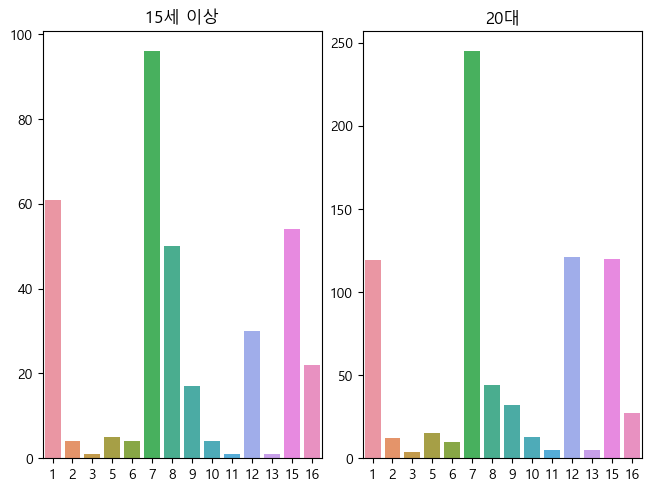

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

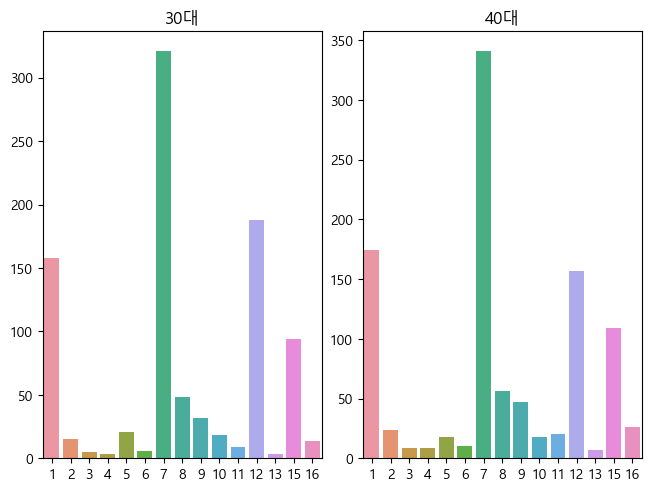

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

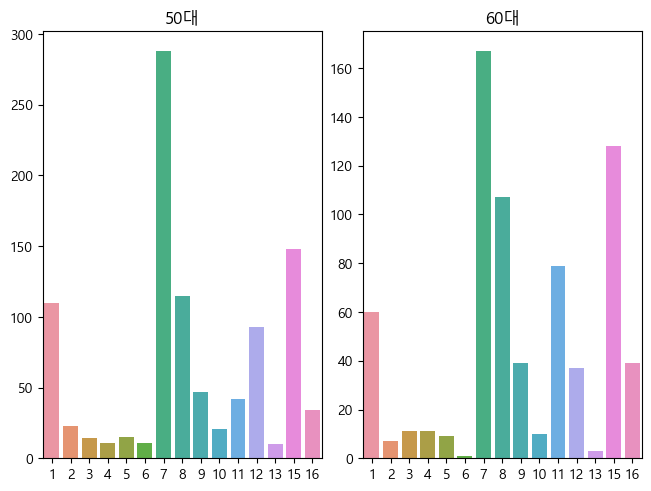

[Text(0.5, 1.0, '70대 이상')]

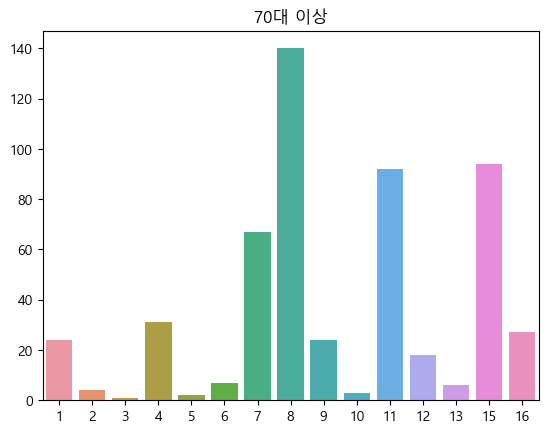

In [39]:
# 연령별 지출하는 항목 barplot
plt.rc('font', family='Malgun Gothic')

_r = 1  # 행
_c = 2  # 열

for i in range(3):
    fig, axis = plt.subplots(_r, _c, constrained_layout=True)
    for j in range(1, 3):
        sns.barplot(
            x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().index, 
            y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().values,
            ax=axis[(j-1)%_c],
        ).set(title=age_code_names[i*_c + j])
    plt.show()

sns.barplot(
    x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().index, 
    y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().values,
).set(title=age_code_names[7])
plt.show()
# 전체적으로 영화 대여(7)가 높은 수치를 보인다.
# 15세 이상 또는 20대 들은 전통예술 대여(4)를 전혀하지 않는다. (아래 코드 참조)
# 70대 이상의 경우, 영화 대여보다 대중예술/음악 대여(8) 빈도가 높다.

# 일반적으로 가장 높은 영화 대여(7)와 너무 낮은 값들을 제외하고
# 비교하기 적절한
# 1, 8, 9, 11, 12, 15에 대해서만 다시 분석한다.

### 적절한 값에 대해서 연령별 지출하는 항목 barplot

In [40]:
# 1, 8, 9, 11, 12, 15에 대해서만 다시 분석
CS_visual = CS_visual[((CS_visual[using_column_names[1]] == 1) |
                           (CS_visual[using_column_names[1]] == 8) |
                           (CS_visual[using_column_names[1]] == 9) |
                           (CS_visual[using_column_names[1]] == 11) |
                           (CS_visual[using_column_names[1]] == 12) |
                           (CS_visual[using_column_names[1]] == 15))]

[Text(0.5, 1.0, '15세 이상')]

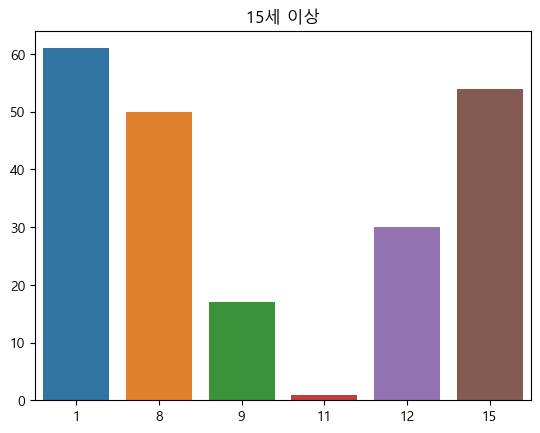

[Text(0.5, 1.0, '20대')]

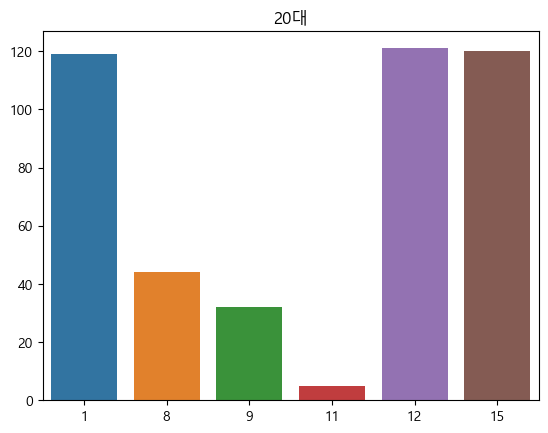

[Text(0.5, 1.0, '30대')]

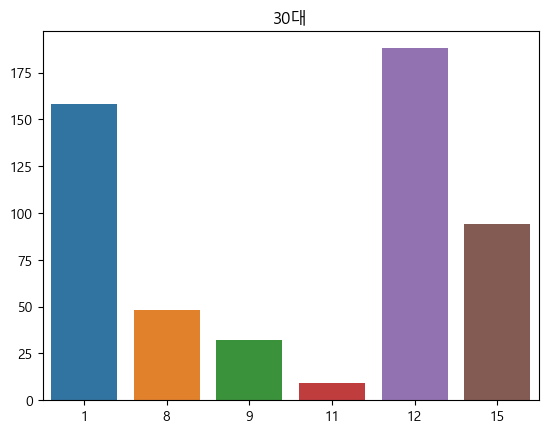

[Text(0.5, 1.0, '40대')]

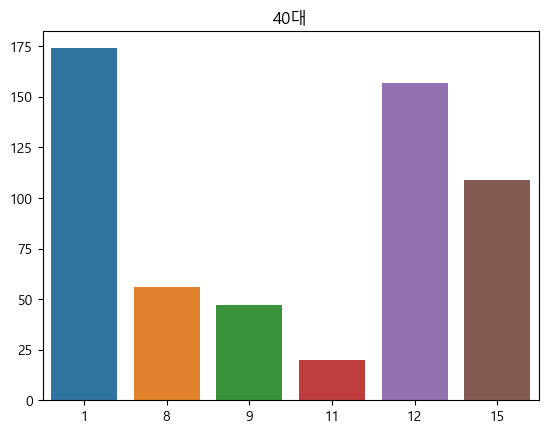

[Text(0.5, 1.0, '50대')]

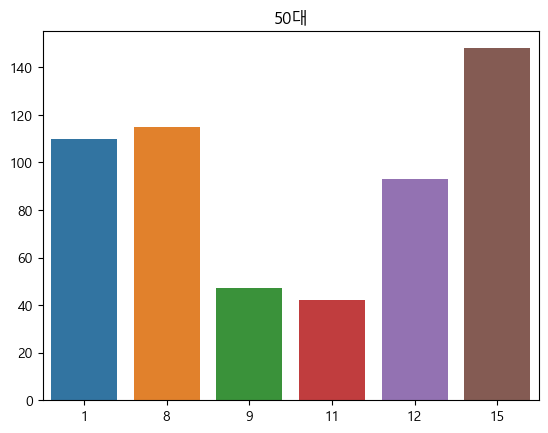

[Text(0.5, 1.0, '60대')]

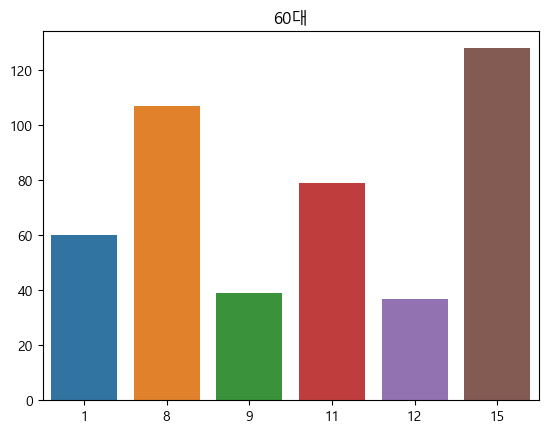

[Text(0.5, 1.0, '70대 이상')]

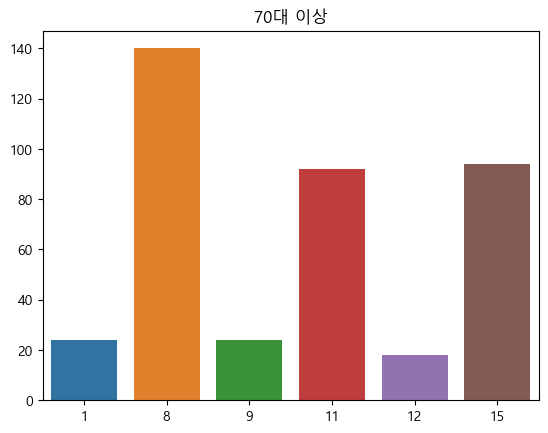

In [41]:
# 연령별 지출하는 항목 barplot
for i in range(1, 8):
    sns.barplot(
        x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().index, 
        y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().values,
    ).set(title=age_code_names[i])
    plt.show()

# 점점 줄어듦 : 문학 대여(1), 연극/뮤지컬 관람(12)
# 점점 늘어남 : 대중예술/음악 대여(8), 전통예술(11), 대중예술/음악 관람(15)
# 고정적인 비율 : 각종 전시회 관람(9)

[Text(0.5, 1.0, '15세 이상')]

[Text(0.5, 1.0, '20대')]

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

[Text(0.5, 1.0, '70대 이상')]

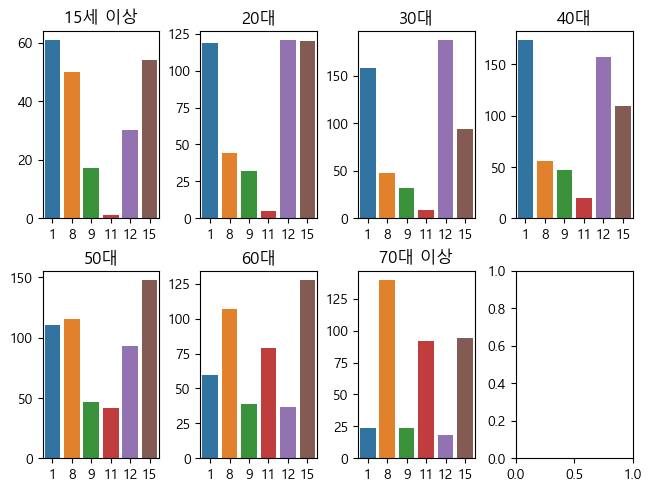

In [42]:
# 연령별 지출하는 항목 barplot
plt.rc('font', family='Malgun Gothic')

nrow = 2
ncol = 4

fig, axis = plt.subplots(nrow, ncol, constrained_layout=True)

for i in range(1, 8):
    sns.barplot(
        x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().index, 
        y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().values,
        ax=axis[(i-1)//ncol, (i-1)%ncol],
    ).set(title=age_code_names[i])
plt.show()

# 점점 줄어듦 : 문학 대여(1), 연극/뮤지컬 관람(12)
# 점점 늘어남 : 대중예술/음악 대여(8), 전통예술(11), 대중예술/음악 관람(15)
# 고정적인 비율 : 각종 전시회 관람(9)

### 값을 제외하지 않고 교차분석

#### pivot 테이블 생성

In [43]:
# 연령에 따른 데이터 개수 다시 출력
print('15세 이상 :', len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == 1]))
for i in range(2, 7):
    print(i*10, '    대 :', len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == i]))
print('70세 이상 :', len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == 7]))

15세 이상 : 1369
20     대 : 3054
30     대 : 3206
40     대 : 3834
50     대 : 3956
60     대 : 2771
70세 이상 : 2434


In [44]:
# 연령에 따라 표본 수를 같게 하기 위한 작업
# 제일 적은 15세 이상을 기준으로 sampling

min_len = len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == 1])

CS_an_sample = CS_an[CS_an[using_column_names[0]] == 1]

for i in range(2, 8):
    df = CS_an[CS_an[using_column_names[0]] == i].sample(n=min_len, random_state=0)
    CS_an_sample = pd.concat([CS_an_sample, df])

In [45]:
# pivot table 생성
CS_an_sample_piv = pd.DataFrame()

for i in range(1, len(age_code_names)+1):
    for j in range(1, len(expense_code_names)+1):
        count_v = CS_an_sample[(CS_an_sample[using_column_names[0]] == i) & (CS_an_sample[using_column_names[1]] == j)].count()[0]
        
        record = pd.DataFrame({
            using_column_names[0] : [i],
            using_column_names[1] : [j],
            'count' : [count_v],
        })
        
        CS_an_sample_piv = pd.concat([CS_an_sample_piv, record], axis=0)

In [46]:
CS_an_sample_piv = CS_an_sample_piv.pivot(index=using_column_names[0], columns=using_column_names[1], values='count')

In [47]:
CS_an_sample_piv

expense,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,,,,,,,,,,,,,,,,
1,61,4,1,0,5,4,96,50,17,4,1,30,1,896,54,22
2,56,5,3,0,5,6,104,17,17,8,1,52,1,923,57,11
3,66,9,3,3,12,2,124,17,15,6,3,83,2,815,38,5
4,62,11,3,2,7,5,113,12,10,7,8,54,0,817,42,6
5,43,5,3,8,4,3,105,40,13,5,17,37,5,645,41,12
6,28,5,5,5,4,0,80,44,22,4,36,18,1,429,63,25
7,14,2,1,16,1,3,38,81,14,2,52,11,5,211,58,12


#### 카이제곱 검정 수행
- 동질성 검정
- H0 : 연령 별로 문화예술 관련 많이 지출하는 항목 비율은 모두 같다.
- H1 : 연령 별로 문화예술 관련 많이 지출하는 항목 비율은 모두 같지는 않다. (적어도 하나는 다르다)

In [48]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(CS_an_sample_piv)

print('p-value : {0:.4f}'.format(pvalue))

# p-value가 0으로 유의수준 5% 에서 유의한 결과를 얻습니다.
# 따라서 대립가설을 채택합니다.

p-value : 0.0000


### 적절한 값을 제외하고 교차분석

#### pivot 테이블 생성

In [49]:
# 연령에 따른 데이터 개수 다시 출력
print('15세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 1]))
for i in range(2, 7):
    print(i*10, '    대 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == i]))
print('70세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 7]))

15세 이상 : 213
20     대 : 441
30     대 : 529
40     대 : 563
50     대 : 555
60     대 : 450
70세 이상 : 392


In [50]:
# 연령에 따라 표본 수를 같게 하기 위한 작업
# 제일 적은 15세 이상을 기준으로 sampling

min_len = len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 1])

CS_an_sample = CS_visual[CS_visual[using_column_names[0]] == 1]

for i in range(2, 8):
    df = CS_visual[CS_visual[using_column_names[0]] == i].sample(n=min_len, random_state=0)
    CS_an_sample = pd.concat([CS_an_sample, df])

In [51]:
CS_an_sample_piv = pd.DataFrame()

for i in range(1, len(age_code_names)+1):
    for j in range(1, len(expense_code_names)+1):
        count_v = CS_an_sample[(CS_an_sample[using_column_names[0]] == i) & (CS_an_sample[using_column_names[1]] == j)].count()[0]
        
        record = pd.DataFrame({
            using_column_names[0] : [i],
            using_column_names[1] : [j],
            'count' : [count_v],
        })
        
        CS_an_sample_piv = pd.concat([CS_an_sample_piv, record], axis=0)

In [52]:
CS_an_sample_piv = CS_an_sample_piv.pivot(index=using_column_names[0], columns=using_column_names[1], values='count')

In [53]:
# 제외한 열 삭제
CS_an_sample_piv = CS_an_sample_piv.T[CS_an_sample_piv.sum(axis=0) != 0].T

In [54]:
CS_an_sample_piv

expense,1,8,9,11,12,15
age,,,,,,
1,61,50,17,1,30,54
2,55,21,16,4,63,54
3,62,20,11,3,75,42
4,71,18,22,7,50,45
5,45,45,14,15,36,58
6,28,53,16,42,10,64
7,13,82,15,50,8,45


#### 카이제곱 검정 수행
- 동질성 검정
- H0 : 연령 별로 문화예술 관련 많이 지출하는 항목 비율은 모두 같다.
- H1 : 연령 별로 문화예술 관련 많이 지출하는 항목 비율은 모두 같지는 않다. (적어도 하나는 다르다)

In [55]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(CS_an_sample_piv)

print('p-value : {0:.4f}'.format(pvalue))

# p-value가 0으로 유의수준 5% 에서 유의한 결과를 얻습니다.
# 따라서 대립가설을 채택합니다.

p-value : 0.0000


## 1-D. 연령(age)에 따라 지출을 늘리고 싶은 항목(expense)에 차이가 있는가?
- 연령
- 문화예술 관련 지출을 늘리고 싶은 항목

In [56]:
# 사용할 column 정의
using_column_names = ['age', 'expense_f']

# 분석에 사용할 df 정의
CS_an = CS[using_column_names]

# 해당사항 없음, 모름/무응답 제외
CS_visual = CS_an[CS_an[using_column_names[1]] != 17]

[Text(0.5, 1.0, 'age')]

[Text(0.5, 1.0, 'expense_f')]

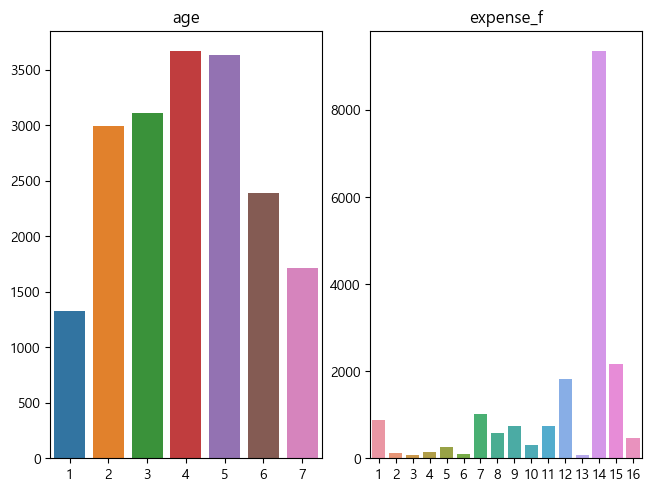

In [57]:
plt.rc('font', family='Malgun Gothic')

srow = 1
scol = 2

fig, axis = plt.subplots(srow, scol, constrained_layout=True)

for i, column in enumerate(using_column_names):
    sns.barplot(
        x = CS_visual[column].value_counts().index, 
        y = CS_visual[column].value_counts().values,
        ax = axis[i],
    ).set(title=column)
    
plt.show()

# 연령대는
# 4~50대가 가장 많으며
# 2~30대가 그 다음이었다.

# 문화예술 관련 지출을 늘리고 싶은 항목은
# 1순위가 영화 관람(14)으로 가장 높으며 다른 답변과 큰 차이를 보였으며,
# 2순위는 방송 프로그램/콘서트 관람(15), 
# 그 다음으로는 연극/뮤지컬 관람(12),
# 영화 대여(7),
# 문학 작품 대여(1) 였다.

# 문화예술 관련 많이 지출하는 항목과 다르게
# 영화 대여의 순위가 비교적 낮았다.

In [58]:
# age 코드명
age_code_names = {
    1 : '15세 이상',
    2 : '20대',
    3 : '30대',
    4 : '40대',
    5 : '50대',
    6 : '60대',
    7 : '70대 이상',
}

In [59]:
# expense, expense_f 코드명
expense_code_names = {
    1 : '문학 작품 대여',
    2 : '미술 ',
    3 : '서양음악 관련 대여',
    4 : '전통예술 대여',
    5 : '연극/뮤지컬 대여',
    6 : '무용 대여',
    7 : '영화 대여',
    8 : '대중예술/음악 대여',
    9 : '각종 전시회 관람',
    10 : '서양음악 관련 관람',
    11 : '전통예술 관람',
    12 : '연극/뮤지컬 관람',
    13 : '무용 관람',
    14 : '영화 관람',
    15 : '대중예술/음악 관람',
    16 : '대여/관람 제외 기타 활동',
}

In [60]:
# 연령에 따른 데이터 개수 출력
print('15세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 1]))
for i in range(2, 7):
    print(i*10, '    대 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == i]))
print('70세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 7]))

15세 이상 : 1331
20     대 : 2990
30     대 : 3111
40     대 : 3668
50     대 : 3628
60     대 : 2385
70세 이상 : 1710


### 연령별 지출하는 항목 barplot

[Text(0.5, 1.0, '15세 이상')]

[Text(0.5, 1.0, '20대')]

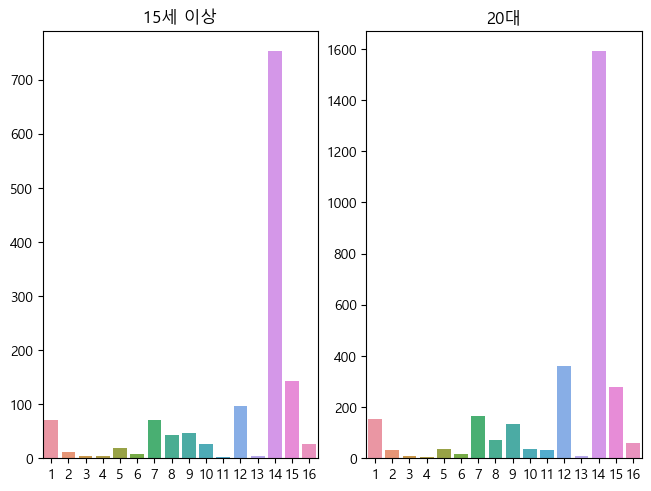

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

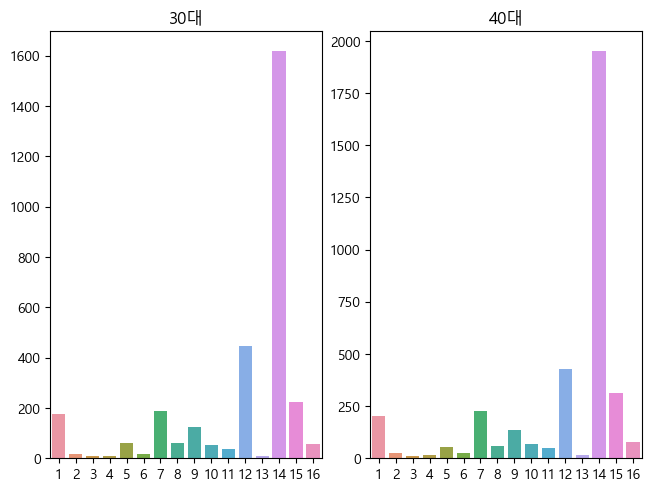

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

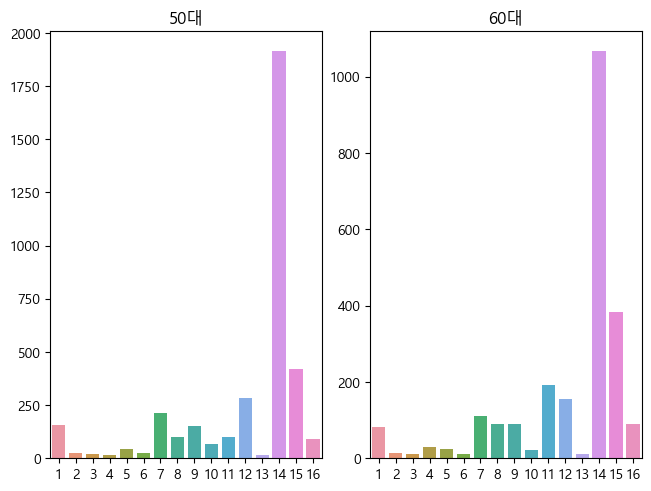

[Text(0.5, 1.0, '70대 이상')]

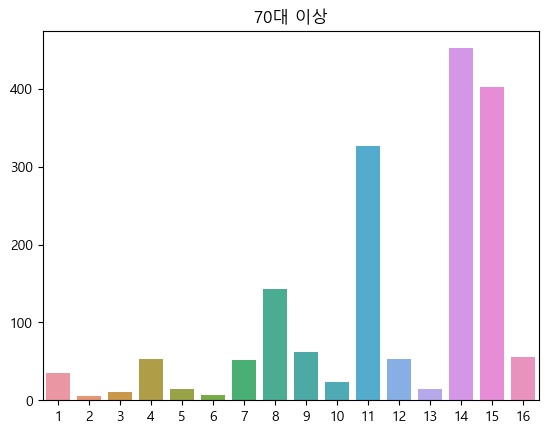

In [61]:
# 연령별 지출하는 항목 barplot
plt.rc('font', family='Malgun Gothic')

_r = 1  # 행
_c = 2  # 열

for i in range(3):
    fig, axis = plt.subplots(_r, _c, constrained_layout=True)
    for j in range(1, 3):
        sns.barplot(
            x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().index, 
            y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().values,
            ax=axis[(j-1)%_c],
        ).set(title=age_code_names[i*_c + j])
    plt.show()

sns.barplot(
    x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().index, 
    y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().values,
).set(title=age_code_names[7])
plt.show()

# 특이하게 70대 이상의 경우, 영화 관람 지출을 늘리고 싶어하는 것을 알 수 있다.
# 영화 관람이 너무 큰 값을 차지하여 나머지 분석이 불가능 하다.

### 영화 관람 제외 연령별 지출하는 항목 barplot

In [62]:
# 영화 관람(14)이 너무 큰 값을 차지하므로 제외 후 분석
CS_visual = CS_visual[CS_visual[using_column_names[1]] != 14]

[Text(0.5, 1.0, '15세 이상')]

[Text(0.5, 1.0, '20대')]

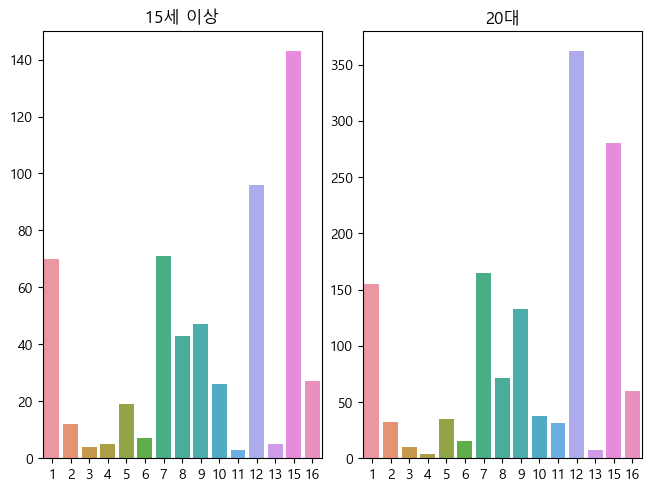

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

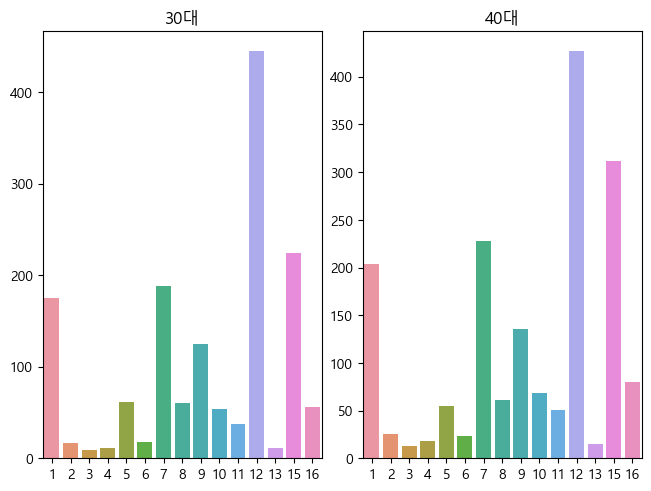

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

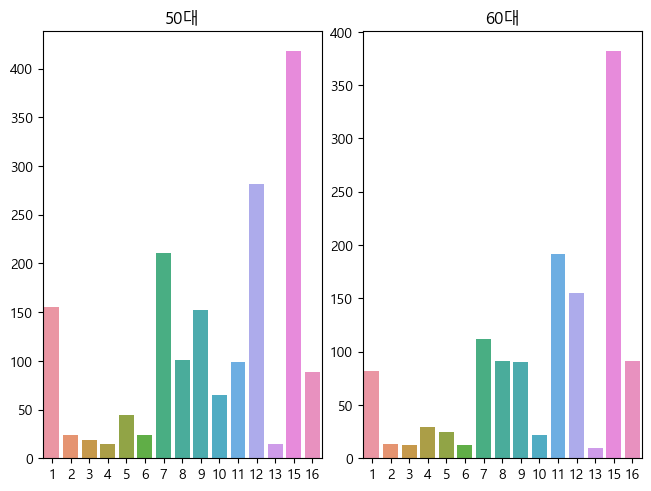

[Text(0.5, 1.0, '70대 이상')]

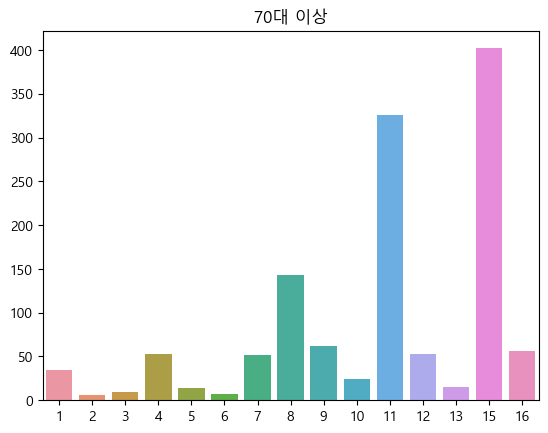

In [63]:
# 연령별 지출하는 항목 barplot
plt.rc('font', family='Malgun Gothic')

_r = 1  # 행
_c = 2  # 열

for i in range(3):
    fig, axis = plt.subplots(_r, _c, constrained_layout=True)
    for j in range(1, 3):
        sns.barplot(
            x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().index, 
            y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i*_c + j].value_counts().values,
            ax=axis[(j-1)%_c],
        ).set(title=age_code_names[i*_c + j])
    plt.show()

sns.barplot(
    x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().index, 
    y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == 7].value_counts().values,
).set(title=age_code_names[7])
plt.show()

# 비교하기 적절한
# 1, 7, 8, 9, 11, 12, 15에 대해서만 다시 분석한다.

### 적절한 값에 대해서 연령별 지출하는 항목 barplot

In [64]:
# 1, 7, 8, 9, 11, 12, 15에 대해서만 다시 분석
CS_visual = CS_visual[((CS_visual[using_column_names[1]] == 1) |
                           (CS_visual[using_column_names[1]] == 7) |
                           (CS_visual[using_column_names[1]] == 8) |
                           (CS_visual[using_column_names[1]] == 9) |
                           (CS_visual[using_column_names[1]] == 11) |
                           (CS_visual[using_column_names[1]] == 12) |
                           (CS_visual[using_column_names[1]] == 15))]

[Text(0.5, 1.0, '15세 이상')]

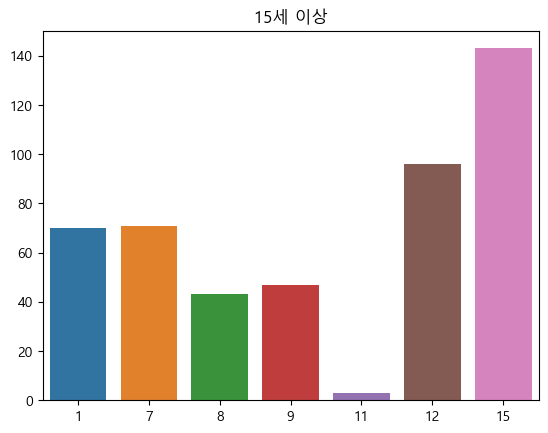

[Text(0.5, 1.0, '20대')]

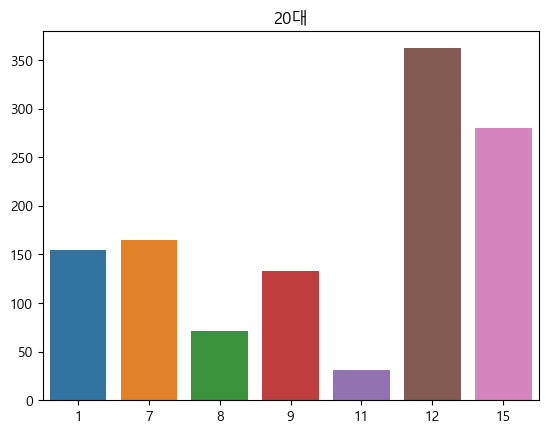

[Text(0.5, 1.0, '30대')]

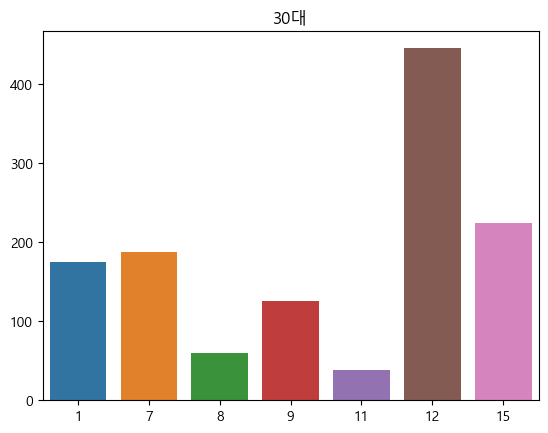

[Text(0.5, 1.0, '40대')]

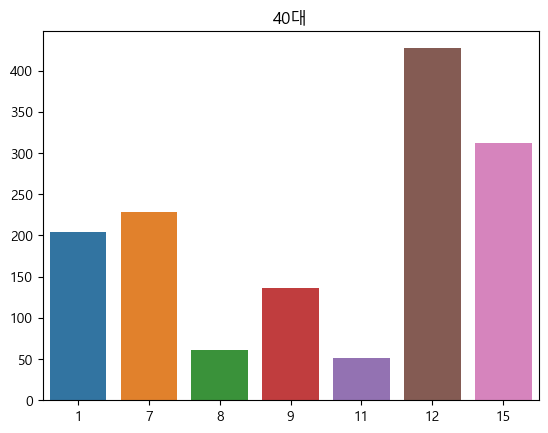

[Text(0.5, 1.0, '50대')]

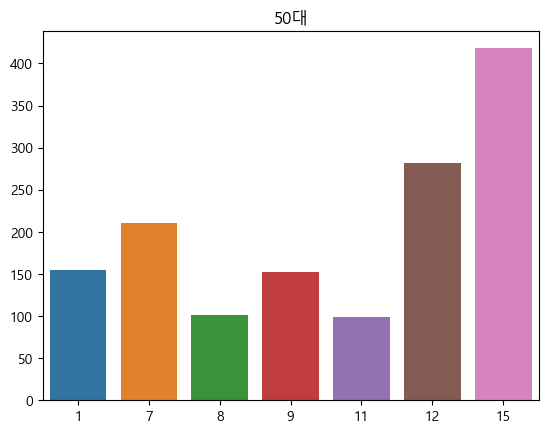

[Text(0.5, 1.0, '60대')]

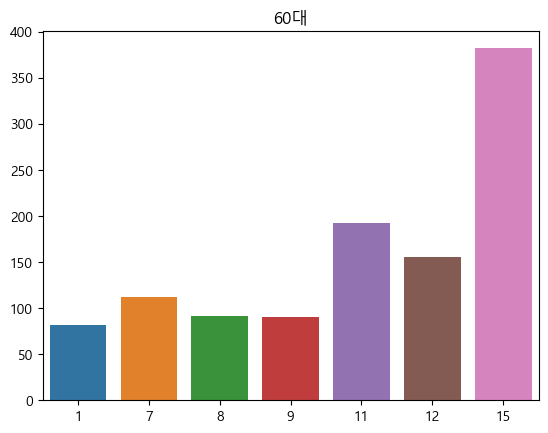

[Text(0.5, 1.0, '70대 이상')]

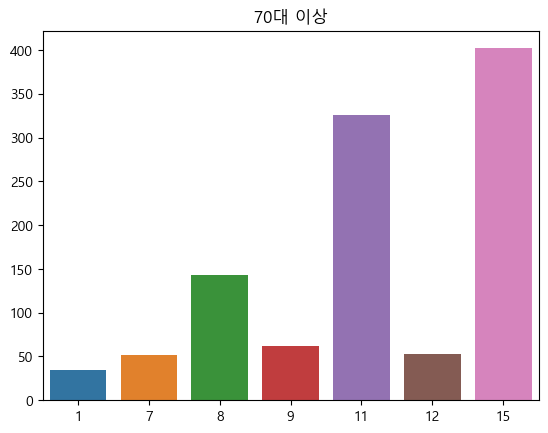

In [65]:
# 연령별 지출하는 항목 barplot
for i in range(1, 8):
    sns.barplot(
        x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().index, 
        y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().values,
    ).set(title=age_code_names[i])
    plt.show()

# 점점 줄어듦 : 문학 대여(1), 영화 대여(7), 각종 전시회 관람(9), 연극/뮤지컬 관람(12)
# 점점 늘어남 : 대중예술/음악 대여(8), 전통예술(11)
# 고정적인 비율 : 대중예술/음악 관람(15)

[Text(0.5, 1.0, '15세 이상')]

[Text(0.5, 1.0, '20대')]

[Text(0.5, 1.0, '30대')]

[Text(0.5, 1.0, '40대')]

[Text(0.5, 1.0, '50대')]

[Text(0.5, 1.0, '60대')]

[Text(0.5, 1.0, '70대 이상')]

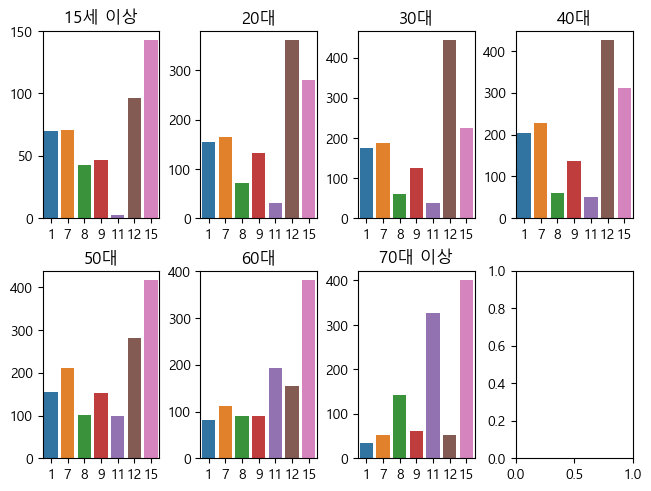

In [66]:
# 연령별 지출하는 항목 barplot
plt.rc('font', family='Malgun Gothic')

nrow = 2
ncol = 4

fig, axis = plt.subplots(nrow, ncol, constrained_layout=True)

for i in range(1, 8):
    sns.barplot(
        x = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().index, 
        y = CS_visual[using_column_names[1]][CS_visual[using_column_names[0]] == i].value_counts().values,
        ax=axis[(i-1)//ncol, (i-1)%ncol],
    ).set(title=age_code_names[i])
plt.show()

# 점점 줄어듦 : 문학 대여(1), 영화 대여(7), 각종 전시회 관람(9), 연극/뮤지컬 관람(12)
# 점점 늘어남 : 대중예술/음악 대여(8), 전통예술(11)
# 고정적인 비율 : 대중예술/음악 관람(15)

### 값을 제외하지 않고 교차분석

#### pivot 테이블 생성

In [67]:
# 연령에 따른 데이터 개수 다시 출력
print('15세 이상 :', len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == 1]))
for i in range(2, 7):
    print(i*10, '    대 :', len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == i]))
print('70세 이상 :', len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == 7]))

15세 이상 : 1369
20     대 : 3054
30     대 : 3206
40     대 : 3834
50     대 : 3956
60     대 : 2771
70세 이상 : 2434


In [68]:
# 연령에 따라 표본 수를 같게 하기 위한 작업
# 제일 적은 15세 이상을 기준으로 sampling

min_len = len(CS_an[using_column_names[0]][CS_an[using_column_names[0]] == 1])

CS_an_sample = CS_an[CS_an[using_column_names[0]] == 1]

for i in range(2, 8):
    df = CS_an[CS_an[using_column_names[0]] == i].sample(n=min_len, random_state=0)
    CS_an_sample = pd.concat([CS_an_sample, df])

In [69]:
CS_an_sample_piv = pd.DataFrame()

for i in range(1, len(age_code_names)+1):
    for j in range(1, len(expense_code_names)+1):
        count_v = CS_an_sample[(CS_an_sample[using_column_names[0]] == i) & (CS_an_sample[using_column_names[1]] == j)].count()[0]
        
        record = pd.DataFrame({
            using_column_names[0] : [i],
            using_column_names[1] : [j],
            'count' : [count_v],
        })
        
        CS_an_sample_piv = pd.concat([CS_an_sample_piv, record], axis=0)

In [70]:
CS_an_sample_piv = CS_an_sample_piv.pivot(index=using_column_names[0], columns=using_column_names[1], values='count')

In [71]:
CS_an_sample_piv

expense_f,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,,,,,,,,,,,,,,,,
1,70,12,4,5,19,7,71,43,47,26,3,96,5,753,143,27
2,74,20,6,2,14,5,65,36,65,20,12,153,1,703,137,25
3,74,9,3,5,33,5,63,21,47,23,21,189,4,715,99,24
4,71,11,3,7,25,8,75,17,41,25,20,179,5,694,100,25
5,48,7,10,5,12,7,83,38,48,18,37,106,5,673,137,28
6,32,7,8,18,13,6,54,38,52,16,90,80,3,523,200,44
7,15,4,6,32,7,4,26,81,33,21,181,32,9,261,225,27


#### 카이제곱 검정 수행
- 동질성 검정
- H0 : 연령 별로 문화예술 관련 지출을 늘리고 싶은 항목 비율은 모두 같다.
- H1 : 연령 별로 문화예술 관련 지출을 늘리고 싶은 항목 비율은 모두 같지는 않다. (최소한 하나는 다르다)

In [72]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(CS_an_sample_piv)

print('p-value : {0:.4f}'.format(pvalue))

# p-value가 0으로 유의수준 5% 에서 유의한 결과를 얻습니다.
# 따라서 대립가설을 채택합니다.

p-value : 0.0000


### 적절한 값을 제외하고 교차분석

#### pivot 테이블 생성

In [73]:
# 연령에 따른 데이터 개수 다시 출력
print('15세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 1]))
for i in range(2, 7):
    print(i*10, '    대 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == i]))
print('70세 이상 :', len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 7]))

15세 이상 : 473
20     대 : 1197
30     대 : 1255
40     대 : 1419
50     대 : 1418
60     대 : 1104
70세 이상 : 1073


In [74]:
# 연령에 따라 표본 수를 같게 하기 위한 작업
# 제일 적은 15세 이상을 기준으로 sampling

min_len = len(CS_visual[using_column_names[0]][CS_visual[using_column_names[0]] == 1])

CS_an_sample = CS_visual[CS_visual[using_column_names[0]] == 1]

for i in range(2, 8):
    df = CS_visual[CS_visual[using_column_names[0]] == i].sample(n=min_len, random_state=0)
    CS_an_sample = pd.concat([CS_an_sample, df])

In [75]:
CS_an_sample_piv = pd.DataFrame()

for i in range(1, len(age_code_names)+1):
    for j in range(1, len(expense_code_names)+1):
        count_v = CS_an_sample[(CS_an_sample[using_column_names[0]] == i) & (CS_an_sample[using_column_names[1]] == j)].count()[0]
        
        record = pd.DataFrame({
            using_column_names[0] : [i],
            using_column_names[1] : [j],
            'count' : [count_v],
        })
        
        CS_an_sample_piv = pd.concat([CS_an_sample_piv, record], axis=0)

In [76]:
CS_an_sample_piv = CS_an_sample_piv.pivot(index=using_column_names[0], columns=using_column_names[1], values='count')

In [77]:
# 제외한 열 삭제
CS_an_sample_piv = CS_an_sample_piv.T[CS_an_sample_piv.sum(axis=0) != 0].T

In [78]:
CS_an_sample_piv

expense_f,1,7,8,9,11,12,15
age,,,,,,,
1,70,71,43,47,3,96,143
2,59,54,31,46,11,148,124
3,70,66,20,48,16,180,73
4,61,73,21,46,17,156,99
5,56,68,29,51,30,96,143
6,34,49,35,38,87,72,158
7,16,28,63,24,148,23,171


#### 카이제곱 검정 수행
- 동질성 검정
- H0 : 연령 별로 문화예술 관련 지출을 늘리고 싶은 항목 비율은 모두 같다.
- H1 : 연령 별로 문화예술 관련 지출을 늘리고 싶은 항목 비율은 모두 같지는 않다. (최소한 하나는 다르다)

In [79]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(CS_an_sample_piv)

print('p-value : {0:.4f}'.format(pvalue))

# p-value가 0으로 유의수준 5% 에서 유의한 결과를 얻습니다.
# 따라서 대립가설을 채택합니다.

p-value : 0.0000


## 2-A. 연령, 학력, 종사상지위, 가구소득, 거주지 별 문화예술행사 관람 횟수의 평균에 차이가 있는가?
- age
- education
- work
- income
- sido
- view_cnt

### 분석 배경
- 개인의 특성인 연령, 교육 수준, 종사상 지위, 가구소득, 거주지는 해당 개인의 생활 방식에 영향을 줄 것으로 보인다.
- 따라서 개인의 특성들에 따른 문화예술행사 관람 횟수에도 차이가 있을 것이며,
- 이 차이가 통계적으로 유의미한 차이를 보이는지 분석해보고자 한다.

In [80]:
# 사용할 column 정의
column_names = ['age', 'education', 'work', 'income', 'sido']
target_name = 'view_cnt'

# 분석 및 시각화에 사용할 df 정의
CS_an = CS[column_names]

In [81]:
# 수도권과 비수도권 구분
sido_range_value = {1 : 1,}
for i in range(2, 18):
    sido_range_value[i] = 2

CS_an['sido_sudo'] = CS_an['sido'].replace(sido_range_value)

In [82]:
# 경기권과 그 외 구분
sido_range_value = {1 : 1,}
for i in range(2, 18):
    sido_range_value[i] = 2
sido_range_value[9] = 1

CS_an['sido_gyeon'] = CS_an['sido'].replace(sido_range_value)

In [83]:
# 분석 및 시각화에 사용할 df 정의
column_names = ['age', 'education', 'work', 'income', 'sido', 'sido_sudo', 'sido_gyeon']
CS_an = pd.concat([CS_an[column_names], CS[target_name]], axis=1)

In [84]:
# 연령대 묶기
CS_an['age'].replace({
    1 : 1,
    2 : 1,
    3 : 2,
    4 : 2,
    5 : 3,
    6 : 3,
    7 : 4,
}, inplace=True)

In [85]:
CS_an

,age,education,work,income,sido,sido_sudo,sido_gyeon,view_cnt
0,3,3,5,3,1,1,1,49
1,3,3,5,7,1,1,1,3
2,1,3,5,6,1,1,1,6
3,2,4,5,5,1,1,1,22
4,2,4,1,3,1,1,1,16
...,...,...,...,...,...,...,...,...
20619,2,4,1,6,1,1,1,59
20620,2,4,5,4,1,1,1,49
20621,3,4,2,6,1,1,1,4
20622,2,4,5,5,1,1,1,58


In [86]:
CS_X = CS_an.drop('view_cnt', axis=1)
CS_y = CS_an['view_cnt']

[Text(0.5, 1.0, 'age')]

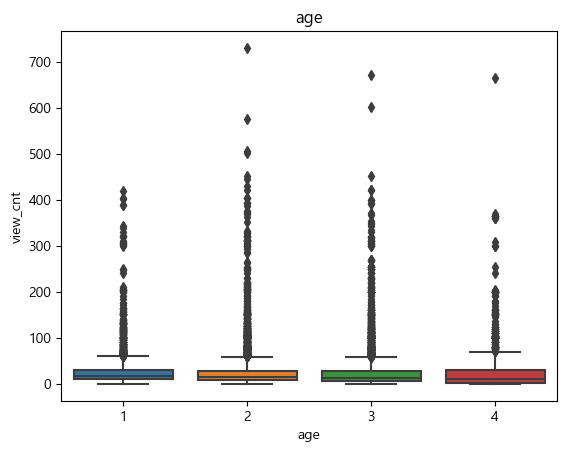

[Text(0.5, 1.0, 'education')]

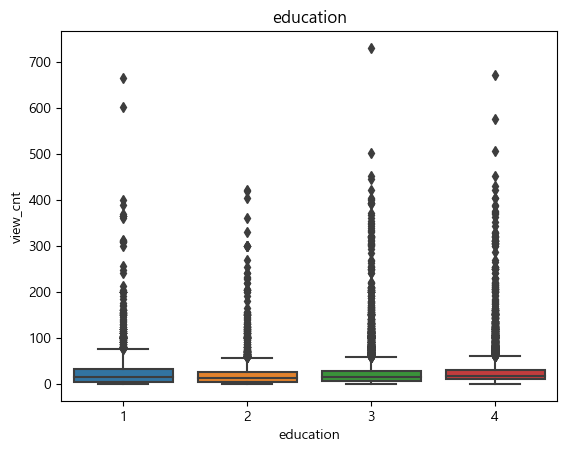

[Text(0.5, 1.0, 'work')]

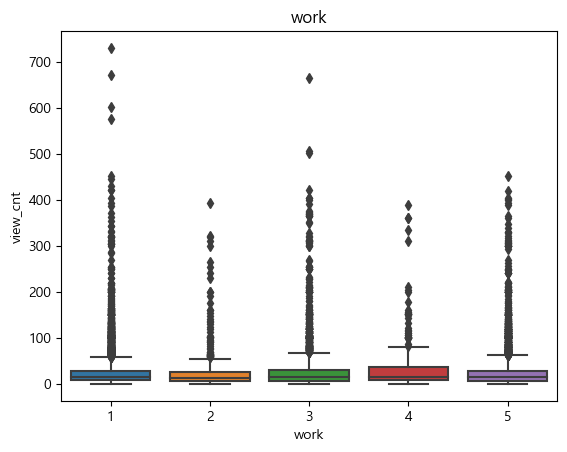

[Text(0.5, 1.0, 'income')]

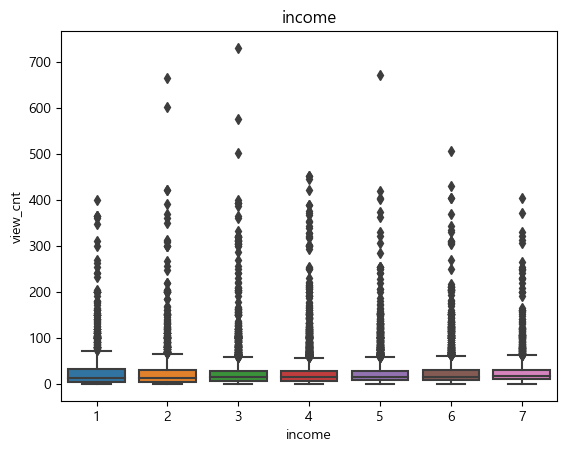

[Text(0.5, 1.0, 'sido')]

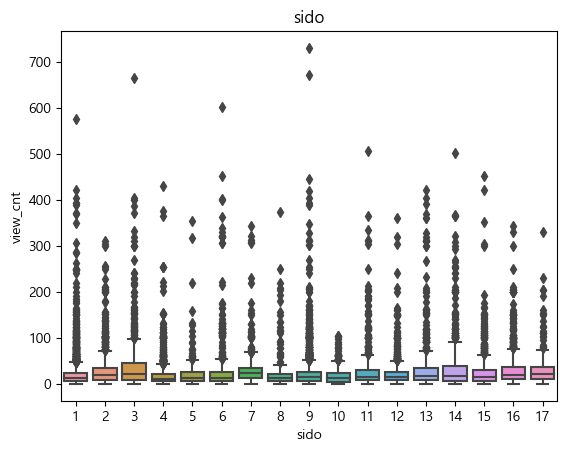

[Text(0.5, 1.0, 'sido_sudo')]

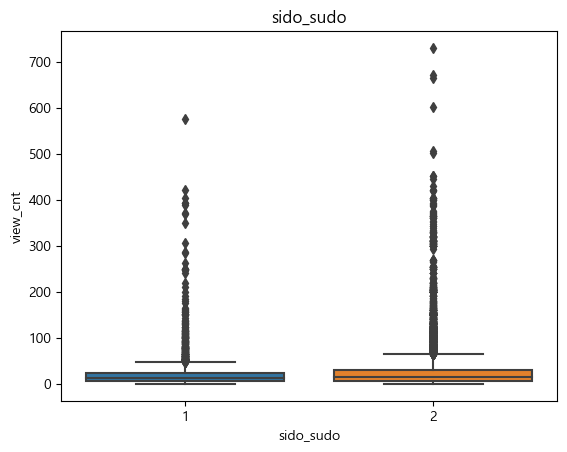

[Text(0.5, 1.0, 'sido_gyeon')]

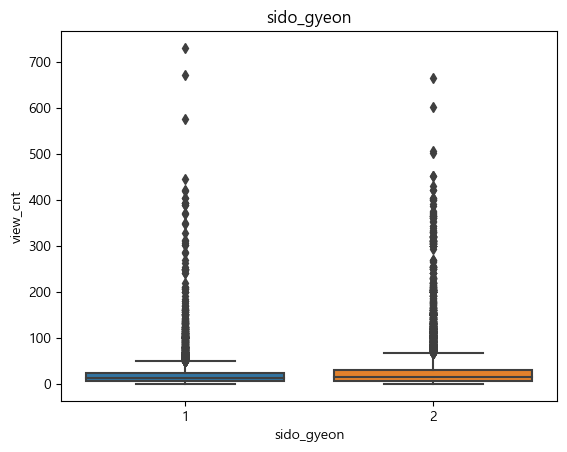

In [87]:
# 각 요인별 Box-plot
for i, column in enumerate(column_names):
    sns.boxplot(
        x = CS_X[column],
        y = CS_y,
    ).set(title=column)
    
    plt.show()

[Text(0.5, 1.0, 'age')]

[Text(0.5, 1.0, 'education')]

[Text(0.5, 1.0, 'work')]

[Text(0.5, 1.0, 'income')]

[Text(0.5, 1.0, 'sido')]

[Text(0.5, 1.0, 'sido_sudo')]

[Text(0.5, 1.0, 'sido_gyeon')]

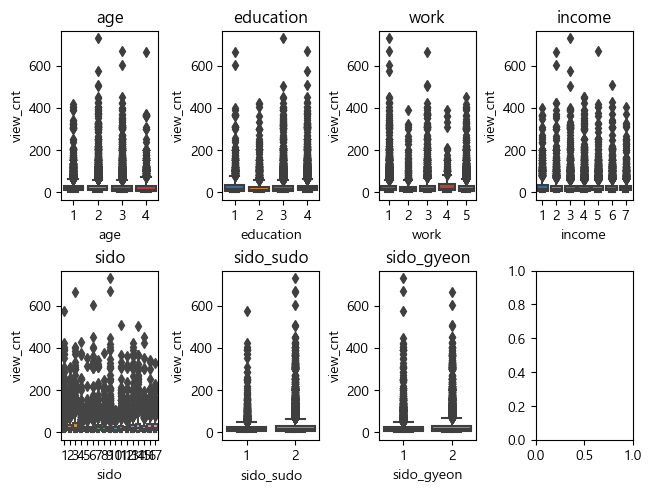

In [88]:
# 각 요인별 Box-plot
plt.rc('font', family='Malgun Gothic')

nrow = 2
ncol = 4

fig, axis = plt.subplots(nrow, ncol, constrained_layout=True)

for i, column in enumerate(column_names):
    sns.boxplot(
        x = CS_X[column],
        y = CS_y,
        ax = axis[i//ncol, i%ncol],
    ).set(title=column)
    
plt.show()

### target 로그변환

In [89]:
CS_y_log = np.log1p(CS_y)

<Axes: xlabel='view_cnt', ylabel='Count'>

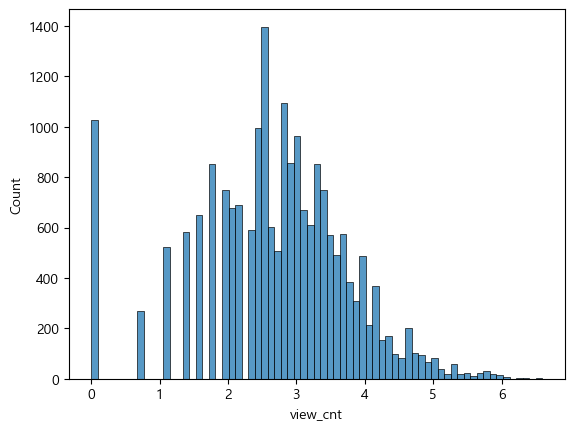

In [90]:
# 로그 처리한 target의 히스토그램
sns.histplot(CS_y_log)

# 0인 값이 많고
# 여전히 왼쪽으로 쏠려있어 정규성을 만족하지 않음

[Text(0.5, 1.0, 'age')]

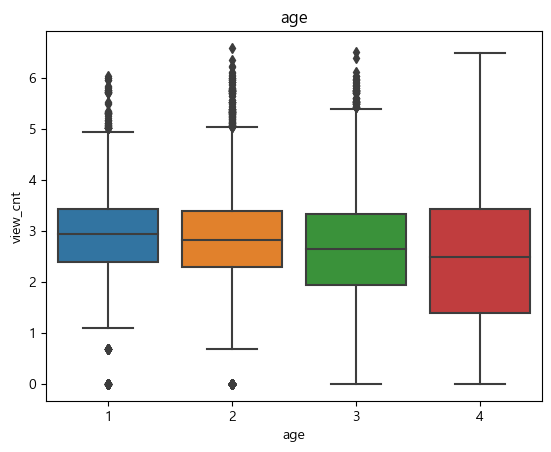

[Text(0.5, 1.0, 'education')]

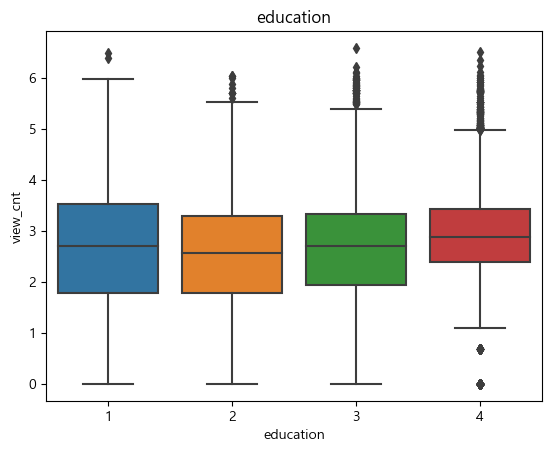

[Text(0.5, 1.0, 'work')]

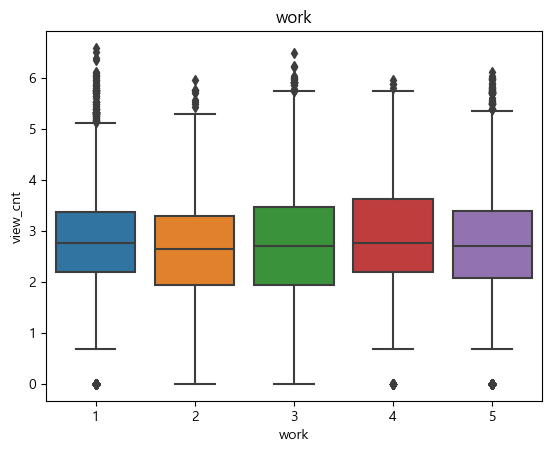

[Text(0.5, 1.0, 'income')]

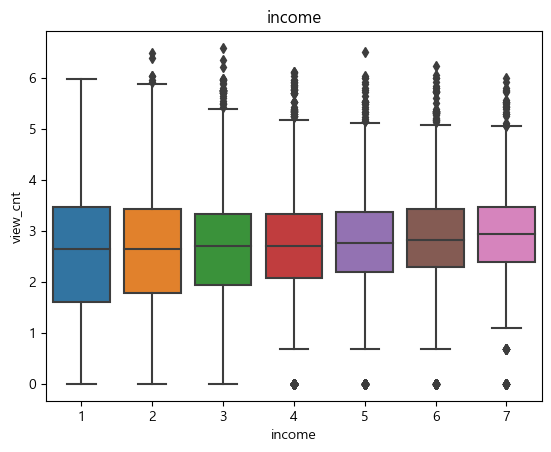

[Text(0.5, 1.0, 'sido')]

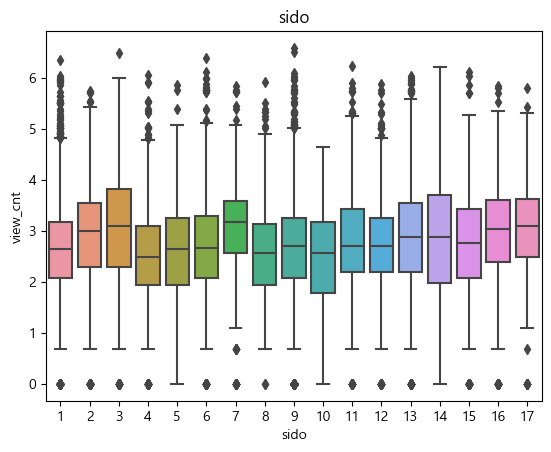

[Text(0.5, 1.0, 'sido_sudo')]

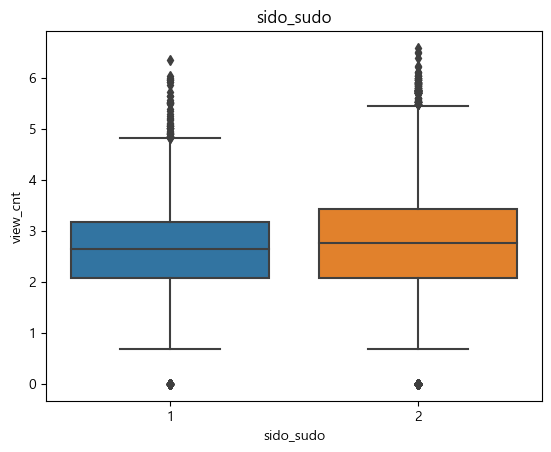

[Text(0.5, 1.0, 'sido_gyeon')]

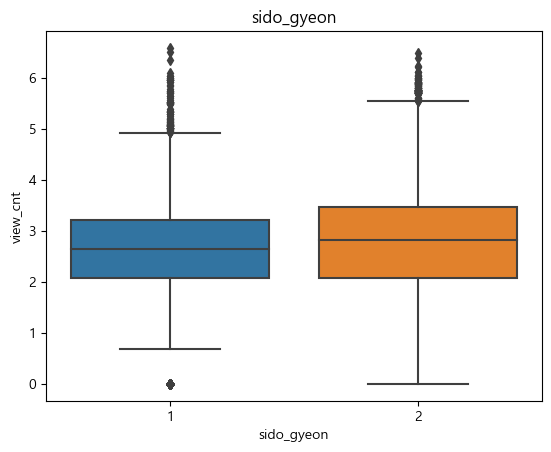

In [91]:
# target에 로그 변환을 한 뒤, 각 요인별 Box-plot
for i, column in enumerate(column_names):
    sns.boxplot(
        x = CS_X[column],
        y = CS_y_log,
    ).set(title=column)
    
    plt.show()

[Text(0.5, 1.0, 'age')]

[Text(0.5, 1.0, 'education')]

[Text(0.5, 1.0, 'work')]

[Text(0.5, 1.0, 'income')]

[Text(0.5, 1.0, 'sido')]

[Text(0.5, 1.0, 'sido_sudo')]

[Text(0.5, 1.0, 'sido_gyeon')]

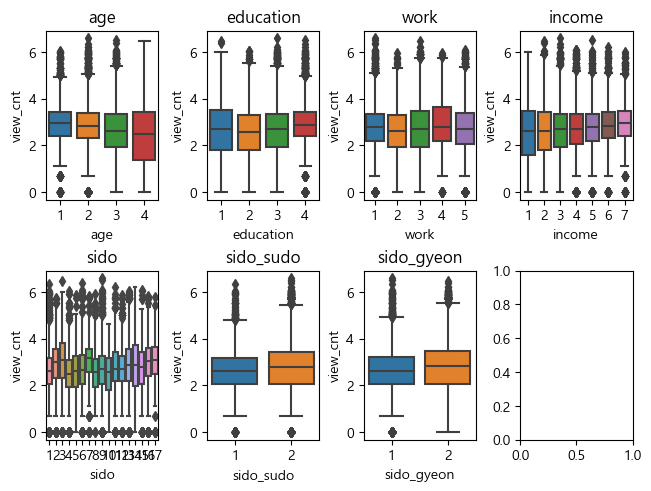

In [92]:
# target에 로그 변환을 한 뒤, 각 요인별 Box-plot
plt.rc('font', family='Malgun Gothic')

nrow = 2
ncol = 4

fig, axis = plt.subplots(nrow, ncol, constrained_layout=True)

for i, column in enumerate(column_names):
    sns.boxplot(
        x = CS_X[column],
        y = CS_y_log,
        ax = axis[i//ncol, i%ncol],
    ).set(title=column)
    
plt.show()

### 일원배치 분산분석
- 요인이 1개일 경우

- H0 : 각 요인에 대해 view_cnt 평균의 차이는 없다.
- H1 : 각 요인에 대해 view_cnt 평균의 차이는 있다.

- 분산분석의 기본 가정
    - 정규성 : 자료의 모집단 분포는 정규분포를 띈다.
    - 등분산성 : 각 그룹의 분산은 서로 같은 분산을 가져야 한다.
    - 독립성 : 각 그룹에 대한 데이터는 서로 영향을 끼치지 않아야 한다.

- 예외
    - 정규성 : 데이터의 수가 아주 많은 경우, 정규성을 띄지 않아도 된다.
    - 등분산성 : 각 그룹간 데이터의 개수가 비슷하고, 어느 두 그룹 간 분산의 비가 모두 4를 넘지 않는 경우 등분산성을 갖지 않아도 된다.

#### 분산분석 기본 가정 확인

- 정규성 가정 시각화

In [93]:
def print_probplots(column_name):
    import math
    import scipy.stats as stats
    
    plt.rc('font', family='Malgun Gothic')
    
    class_count = len(CS_X[column_name].value_counts())
    
    ncol = 2
    nrow = math.ceil(class_count / ncol)
    figsize = 12, 6
    
    fig, axis = plt.subplots(nrow, ncol, figsize=figsize)
    
    if nrow == 1:
        for i in range(class_count):
            stats.probplot(CS_y_log[CS_X[column_name] == i+1], dist=stats.norm, plot=axis[i % ncol])
    else:
        for i in range(class_count):
            stats.probplot(CS_y_log[CS_X[column_name] == i+1], dist=stats.norm, plot=axis[i // ncol, i % ncol])
    plt.axis('equal')
    plt.show()

In [94]:
def print_probplots(column_name):
    import scipy.stats as stats
    
    class_count = len(CS_X[column_name].value_counts())

    for i in range(class_count):
        plt.figure()
        stats.probplot(CS_y_log[CS_X[column_name] == i+1], dist=stats.norm, plot=plt)
        plt.show()

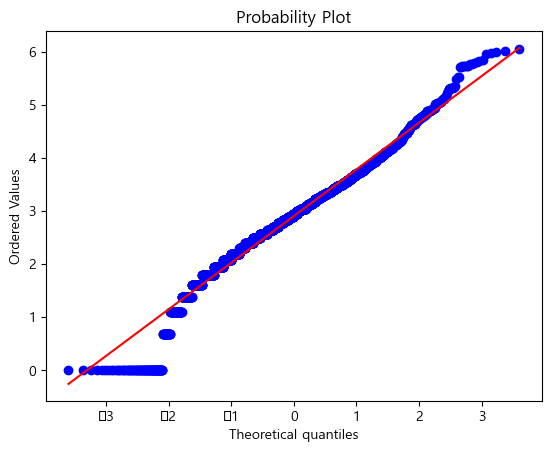

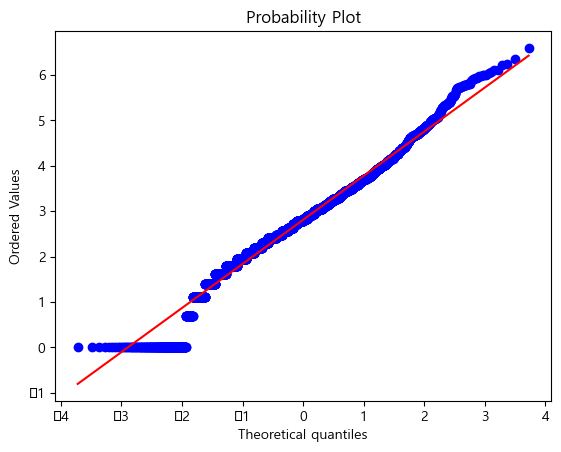

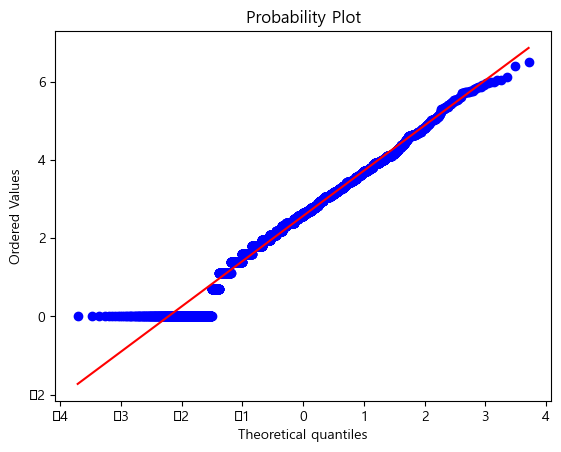

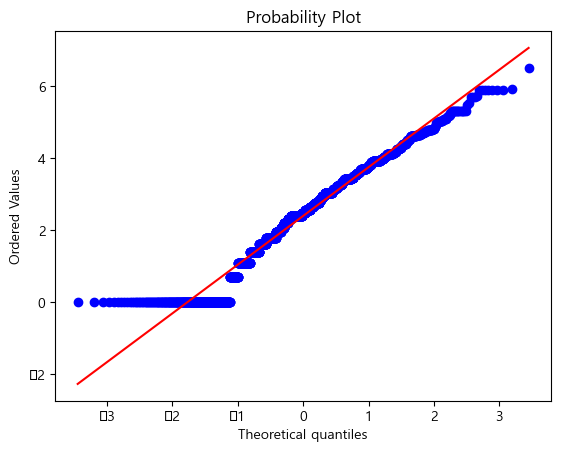

In [95]:
# 0. 연령
print_probplots('age')

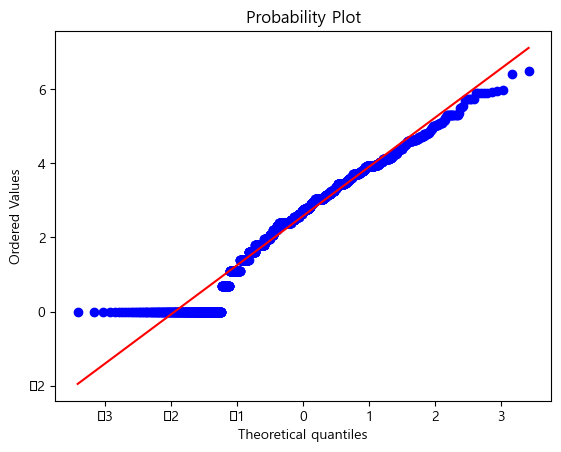

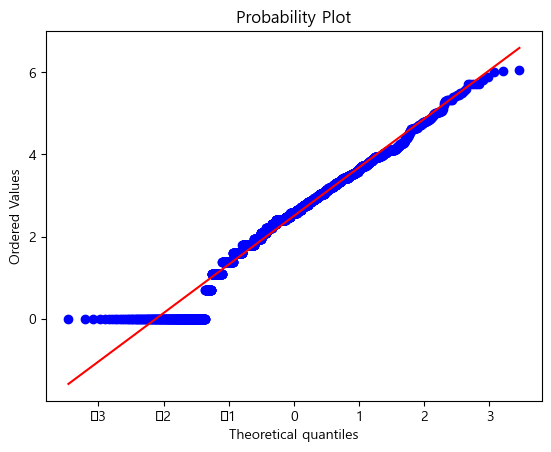

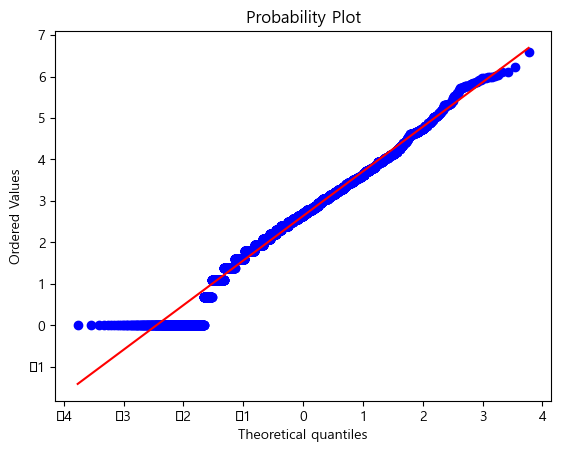

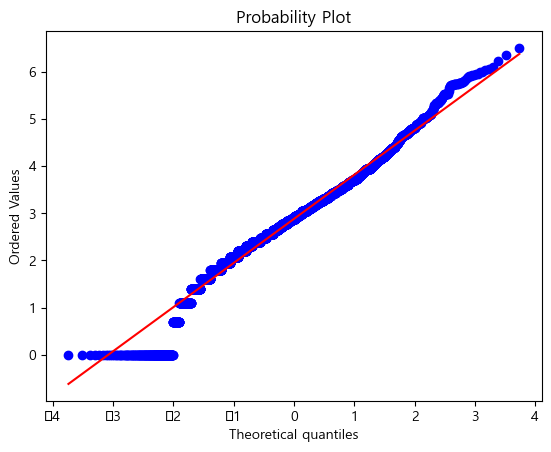

In [96]:
# 1. 학력
print_probplots('education')

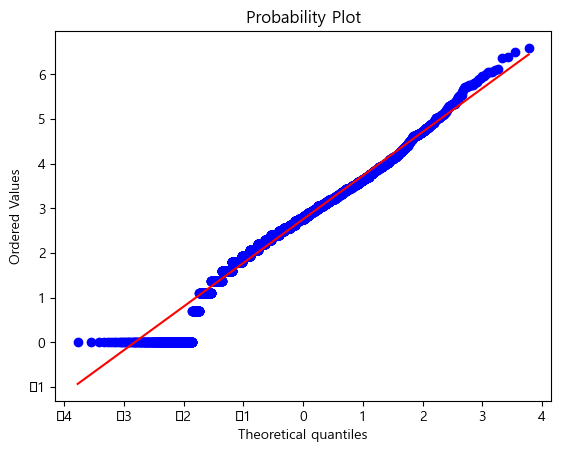

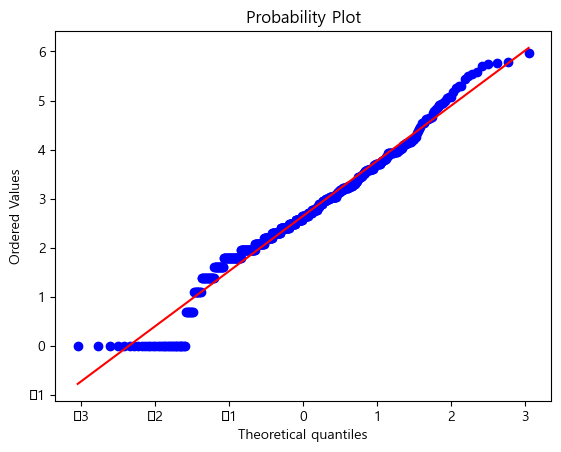

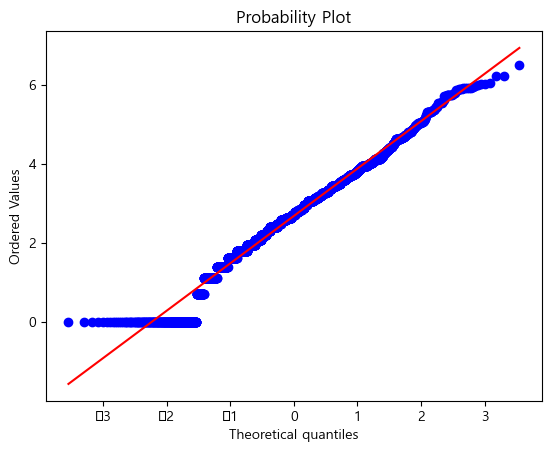

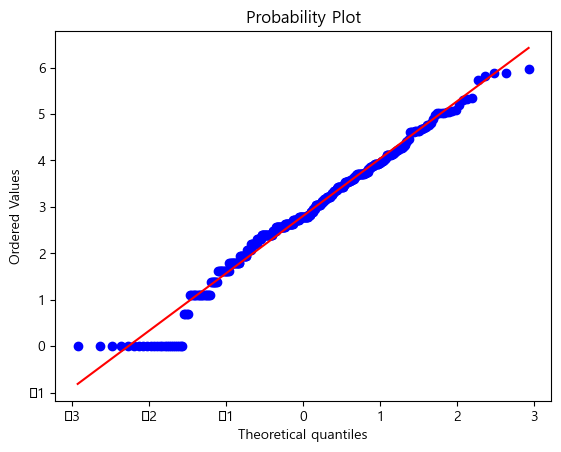

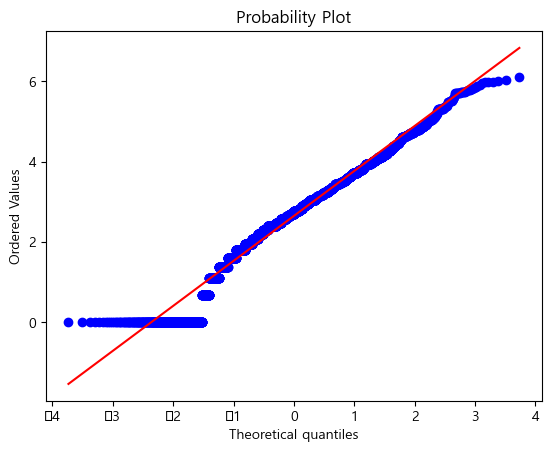

In [97]:
# 2. 종사상 지위
print_probplots('work')

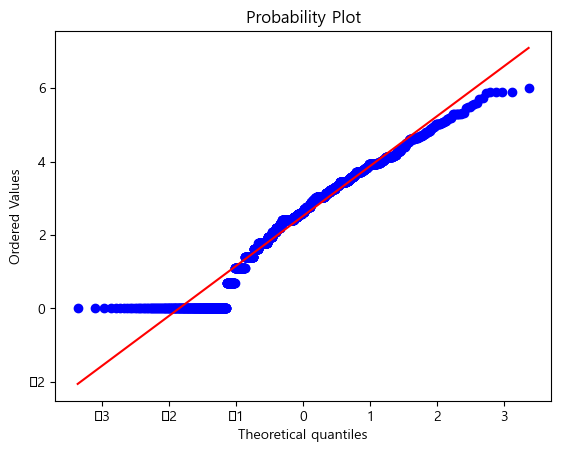

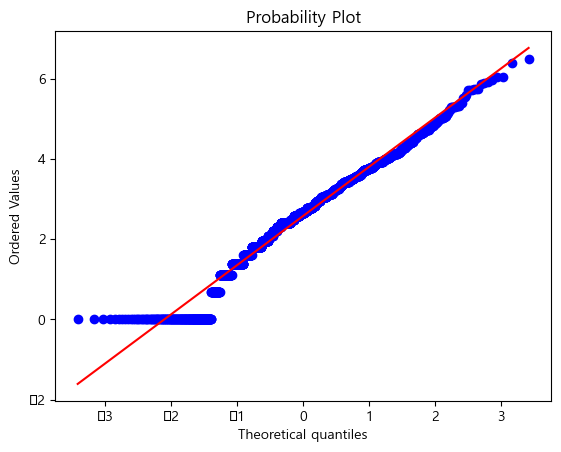

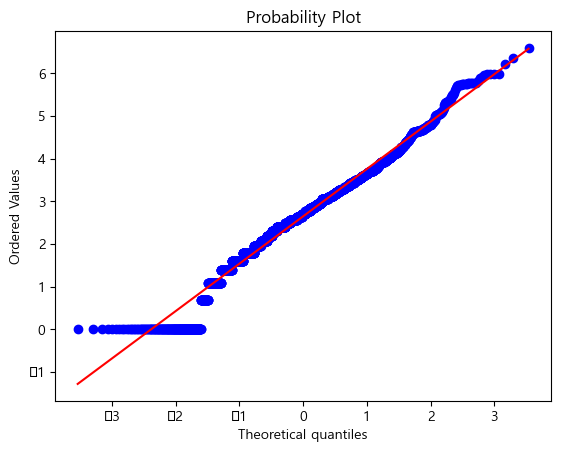

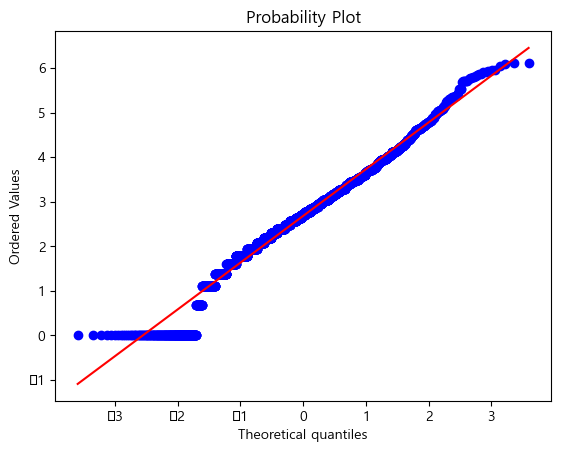

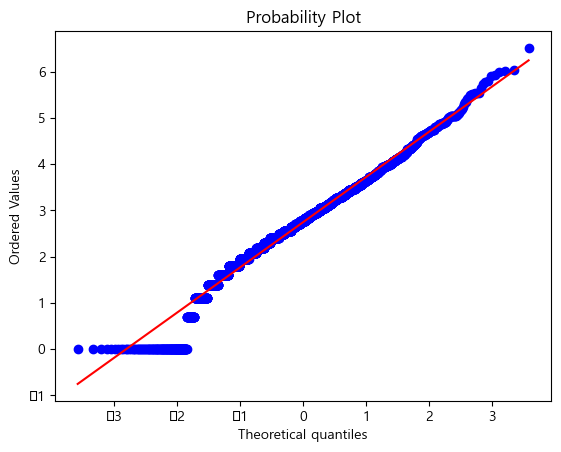

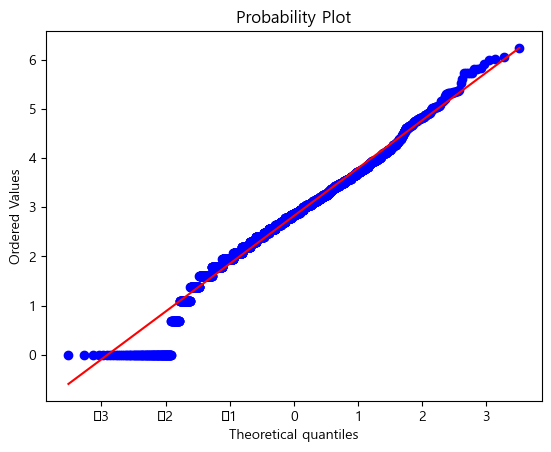

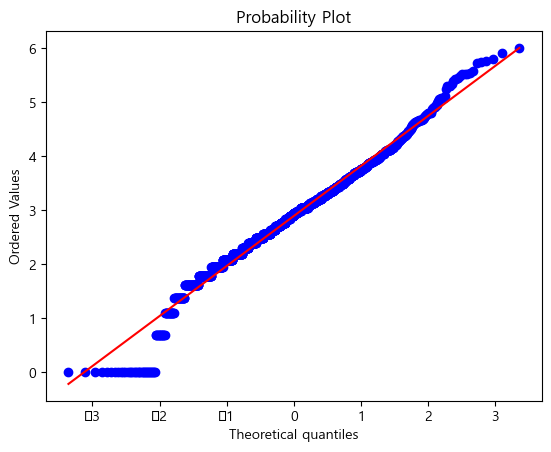

In [98]:
# 3. 가구소득
print_probplots('income')

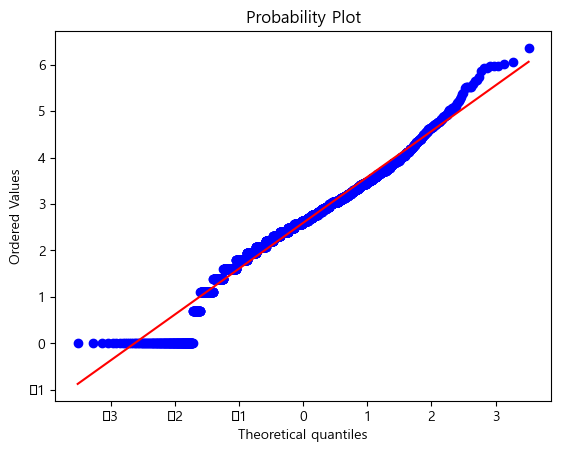

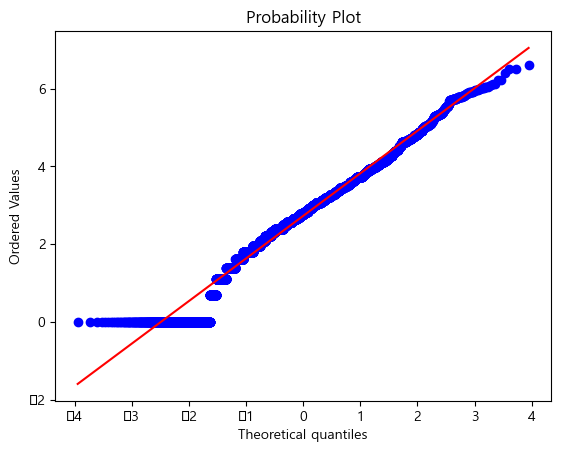

In [99]:
# 4. 거주지 (서울과 그 외)
print_probplots('sido_sudo')

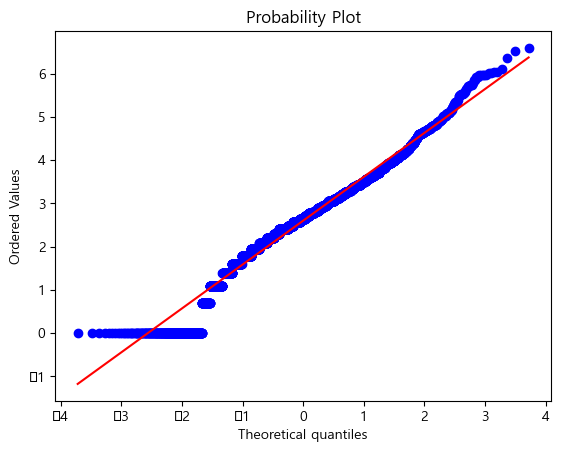

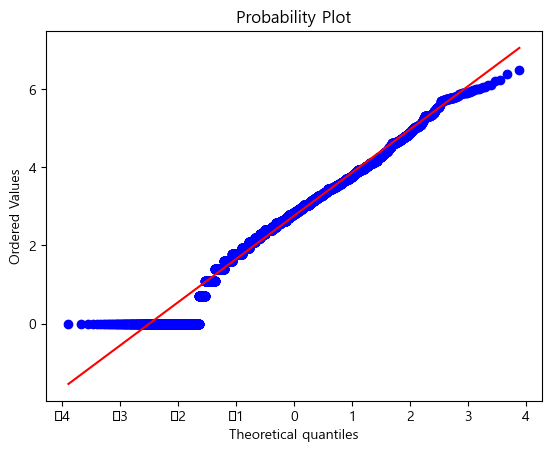

In [100]:
# 5. 거주지 (수도권)
print_probplots('sido_gyeon')

- 정규성 검정 Shapiro Test

In [101]:
def print_shapiro_result(column_name, level):
    from scipy.stats import shapiro
    
    class_count = len(CS_X[column_name].value_counts())
    
    print('\n' + column_name + '의 정규성 검정(Shapiro Test) 결과')
    for i in range(class_count):
        data = CS_y_log[CS_X[column_name] == i+1]
        shapiro_test = shapiro(data)
        print("p-value = " + str(round(shapiro_test[1], 4)) + "로 " + str(i+1) + ': 유의수준 ' + str(level) + '에서 유의함' if shapiro_test[1] < level else str(i+1) + ': 유의수준 ' + str(level) + '에서 유의하지 않음')

In [102]:
column_names = ['age', 'education', 'work', 'income', 'sido_sudo', 'sido_gyeon']
level = 0.05

for column_name in column_names:
    print_shapiro_result(column_name, level)


age의 정규성 검정(Shapiro Test) 결과
p-value = 0.0로 1: 유의수준 0.05에서 유의함
p-value = 0.0로 2: 유의수준 0.05에서 유의함
p-value = 0.0로 3: 유의수준 0.05에서 유의함
p-value = 0.0로 4: 유의수준 0.05에서 유의함

education의 정규성 검정(Shapiro Test) 결과
p-value = 0.0로 1: 유의수준 0.05에서 유의함
p-value = 0.0로 2: 유의수준 0.05에서 유의함
p-value = 0.0로 3: 유의수준 0.05에서 유의함
p-value = 0.0로 4: 유의수준 0.05에서 유의함

work의 정규성 검정(Shapiro Test) 결과
p-value = 0.0로 1: 유의수준 0.05에서 유의함
p-value = 0.0로 2: 유의수준 0.05에서 유의함
p-value = 0.0로 3: 유의수준 0.05에서 유의함
p-value = 0.0로 4: 유의수준 0.05에서 유의함
p-value = 0.0로 5: 유의수준 0.05에서 유의함

income의 정규성 검정(Shapiro Test) 결과
p-value = 0.0로 1: 유의수준 0.05에서 유의함
p-value = 0.0로 2: 유의수준 0.05에서 유의함
p-value = 0.0로 3: 유의수준 0.05에서 유의함
p-value = 0.0로 4: 유의수준 0.05에서 유의함
p-value = 0.0로 5: 유의수준 0.05에서 유의함
p-value = 0.0로 6: 유의수준 0.05에서 유의함
p-value = 0.0로 7: 유의수준 0.05에서 유의함

sido_sudo의 정규성 검정(Shapiro Test) 결과
p-value = 0.0로 1: 유의수준 0.05에서 유의함
p-value = 0.0로 2: 유의수준 0.05에서 유의함

sido_gyeon의 정규성 검정(Shapiro Test) 결과
p-value = 0.0로 1: 유의수준 0.05에서 유의함
p-value = 0.0로 

#### 정규성 검정 결과
- 정규성을 띄지 않음
- 그러나 정규성 및 나머지 가정에 대해 만족한다고 가정 후 분석 진행

In [103]:
# 분산분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for i, column in enumerate(column_names):
    df = pd.concat([CS_X[column], CS_y], axis=1)
    
    model = ols('view_cnt ~ C(' + column + ')', df).fit()

    print("\n", column)
    print(anova_lm(model))
    
# 결론
# 유의수준 0.05에서 모든 p-value가 0.05보다 작으므로
# 학력, 종사상지위, 가구소득에 따른 문화예술행사 관람 횟수의 평균의 차이는 존재한다고 할 수 있다.
# 지역에 따른 문화예술행사 관람 횟수의 평균의 차이 또한 존재한다고 할 수 있다.


 age
               df        sum_sq      mean_sq        F    PR(>F)
C(age)        3.0  2.055524e+04  6851.746357  4.78129  0.002478
Residual  20620.0  2.954914e+07  1433.032959      NaN       NaN

 education
                   df        sum_sq       mean_sq          F        PR(>F)
C(education)      3.0  7.846547e+04  26155.155277  18.287447  7.609212e-12
Residual      20620.0  2.949123e+07   1430.224509        NaN           NaN

 work
               df        sum_sq       mean_sq         F        PR(>F)
C(work)       4.0  6.530054e+04  16325.135513  11.40874  3.002065e-09
Residual  20619.0  2.950439e+07   1430.932359       NaN           NaN

 income
                df        sum_sq      mean_sq         F   PR(>F)
C(income)      6.0  2.359470e+04  3932.449782  2.744028  0.01149
Residual   20617.0  2.954610e+07  1433.094056       NaN      NaN

 sido_sudo
                   df        sum_sq       mean_sq          F        PR(>F)
C(sido_sudo)      1.0  6.149725e+04  61497.252907  42.977

### 사후검정
- Tuckey's HSD

In [104]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### 학력, 종사상 지위, 가구소득에 따른 평균 차이 사후검정
- 지역은 카테고리가 너무 많거나 이진분류이기 때문에 사후검정 하지 않음
- p-adj는 수정된 p-value임
    - 귀무가설이 참인 상황에서 귀무가설을 기각할 확률인 제 1종 오류를 범하지 않도록
    - 더 보수적으로 접근하는 p-value

In [105]:
# 연령에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['age'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 연령이
# '15~49세(1, 2)'와 '50~69세(3)' 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.1209,0.9984,-1.7452,1.9871,False
1,3,-2.0338,0.0283,-3.9166,-0.151,True
1,4,-1.5889,0.3434,-4.0435,0.8657,False
2,3,-2.1548,0.0047,-3.813,-0.4965,True
2,4,-1.7099,0.2192,-3.9968,0.5771,False
3,4,0.4449,0.9598,-1.8556,2.7455,False


,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,3,-2.0338,0.0283,-3.9166,-0.1510,True
3,2,3,-2.1548,0.0047,-3.8130,-0.4965,True


In [106]:
# 학력에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['education'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 학력이
# '초졸 이하(1)' 와 '중졸(2)'/'고졸(3)' 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.
# '중졸(2)'/'고졸(3)' 과 '대졸 이상(4)'의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-5.4646,0.0,-8.3097,-2.6196,True
1,3,-4.3051,0.0,-6.6524,-1.9579,True
1,4,-0.9954,0.7042,-3.3719,1.3812,False
2,3,1.1595,0.5271,-1.0372,3.3562,False
2,4,4.4693,0.0,2.2412,6.6973,True
3,4,3.3098,0.0,1.7672,4.8523,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,-5.4646,0.0,-8.3097,-2.6196,True
1,1,3,-4.3051,0.0,-6.6524,-1.9579,True
4,2,4,4.4693,0.0,2.2412,6.6973,True
5,3,4,3.3098,0.0,1.7672,4.8523,True


In [107]:
# 종사상 지위에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['work'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 종사상 지위가
# '임금, 봉급 근로자(1)' 와 '고용원이 없는 자영자(3)'/'무급가족종사자(4)'
# '고용원이 없는 자영자(3)'/'무급가족종사자(4)' 와 '무직(5)'
# 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.767,0.8049,-2.6021,6.1361,False
1,3,3.7431,0.0,1.6866,5.7997,True
1,4,8.1338,0.0002,2.8945,13.3731,True
1,5,-0.1513,0.9991,-1.7846,1.482,False
2,3,1.9761,0.763,-2.5929,6.5451,False
2,4,6.3668,0.0676,-0.2738,13.0073,False
2,5,-1.9183,0.7568,-6.3131,2.4765,False
3,4,4.3906,0.174,-1.0165,9.7978,False
3,5,-3.8944,0.0,-6.005,-1.7838,True
4,5,-8.2851,0.0002,-13.5458,-3.0243,True


,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,3,3.7431,0.0000,1.6866,5.7997,True
2,1,4,8.1338,0.0002,2.8945,13.3731,True
8,3,5,-3.8944,0.0000,-6.0050,-1.7838,True
9,4,5,-8.2851,0.0002,-13.5458,-3.0243,True


In [108]:
# 가구소득에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['income'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 가구소득이
# '400-500만원(5)' 과 '600만원 이상(7)'
# 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

# 가구소득에 따른 평균 차이는 카테고리 한 개에 대해서만 차이가 존재한다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.259,0.9444,-4.8233,2.3053,False
1,3,-1.6531,0.7448,-4.9019,1.5957,False
1,4,-2.4078,0.2656,-5.5544,0.7388,False
1,5,-2.9731,0.0822,-6.1395,0.1934,False
1,6,-0.7637,0.9936,-4.0675,2.54,False
1,7,0.2659,1.0,-3.479,4.0108,False
2,3,-0.3941,0.9998,-3.4511,2.6629,False
2,4,-1.1488,0.9127,-4.0969,1.7993,False
2,5,-1.7141,0.6146,-4.6834,1.2553,False
2,6,0.4953,0.9992,-2.62,3.6106,False


,group1,group2,meandiff,p-adj,lower,upper,reject
19,5,7,3.239,0.0431,0.0551,6.4228,True


### 이원배치 분산분석
- 요인이 2개일 경우
- 학력과 종사상 지위에 대해 분석
---
- 한 feature의 변화가 target에 미치는 영향이 다른 feature의 수준(카테고리 값)에 따라 달라지는가?
- 즉, '학력'의 변화가 target에 미치는 영향이 '종사상 지위'의 변화에 따라 달라지는가?
- 달라진다면, '학력(x1)'과 '종사상 지위(x2)'가 target에 끼치는 영향이 단일 변수로 존재하는 것이 아닌,
- 상호작용 효과가 존재한다.
    - 연속형 변수에 비유하자면, x1 과 x2만이 target에 영향을 끼치는 것이 아닌,
    - x1, x2, x1 * x2 가 target에 영향을 끼치는 것이다.

In [109]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.concat([CS_X[['education', 'work']], CS_y], axis=1)

form = 'view_cnt ~ C(education) + C(work) + C(education):C(work)'
model = ols(form, df).fit()

print(anova_lm(model))

# 결론
# 유의수준 0.05에서 p-value가 0.000으로
# 학력과 종사상 지위의 문화예술행사 관람 횟수의 평균에 대한 상호작용 효과가 존재한다.

                           df        sum_sq       mean_sq          F  \
C(education)              3.0  7.846547e+04  26155.155277  18.368303   
C(work)                   4.0  7.623062e+04  19057.655948  13.383855   
C(education):C(work)     12.0  7.637083e+04   6364.235631   4.469490   
Residual              20604.0  2.933863e+07   1423.928748        NaN   

                            PR(>F)  
C(education)          6.756799e-12  
C(work)               6.799259e-11  
C(education):C(work)  3.251122e-07  
Residual                       NaN  


### target이 0인 값 제외 후 분석

#### target이 0인 행 제거

In [110]:
CS_X = CS_X[CS_y_log != 0]
CS_y_log = CS_y_log[CS_y != 0]
CS_y = CS_y[CS_y != 0]

In [111]:
CS_X.shape
CS_y_log.shape
CS_y.shape

(19597, 7)

(19597,)

(19597,)

#### 분산분석 기본 가정 확인

- 정규성 가정 시각화

In [112]:
def print_probplots(column_name):
    import math
    import scipy.stats as stats
    
    class_count = len(CS_X[column_name].value_counts())
    
    ncol = 2
    nrow = math.ceil(class_count / ncol)
    figsize = 12, 6
    
    fig, axis = plt.subplots(nrow, ncol, figsize=figsize)
    
    if nrow == 1:
        for i in range(class_count):
            stats.probplot(CS_y_log[CS_X[column_name] == i+1], dist=stats.norm, plot=axis[i % ncol])
    else:
        for i in range(class_count):
            stats.probplot(CS_y_log[CS_X[column_name] == i+1], dist=stats.norm, plot=axis[i // ncol, i % ncol])
    plt.axis('equal')
    plt.show()

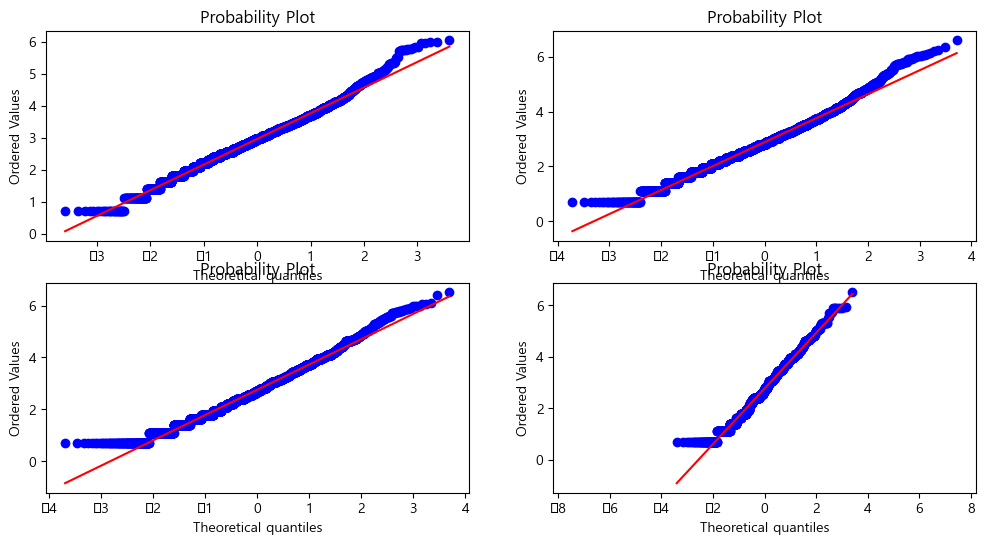

In [113]:
# 0. 연령
print_probplots('age')

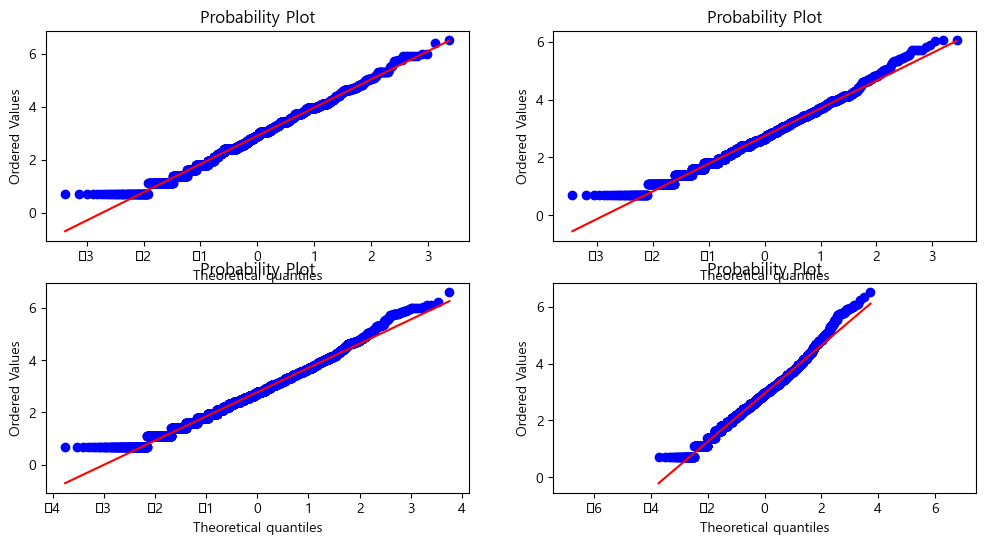

In [114]:
# 1. 학력
print_probplots('education')

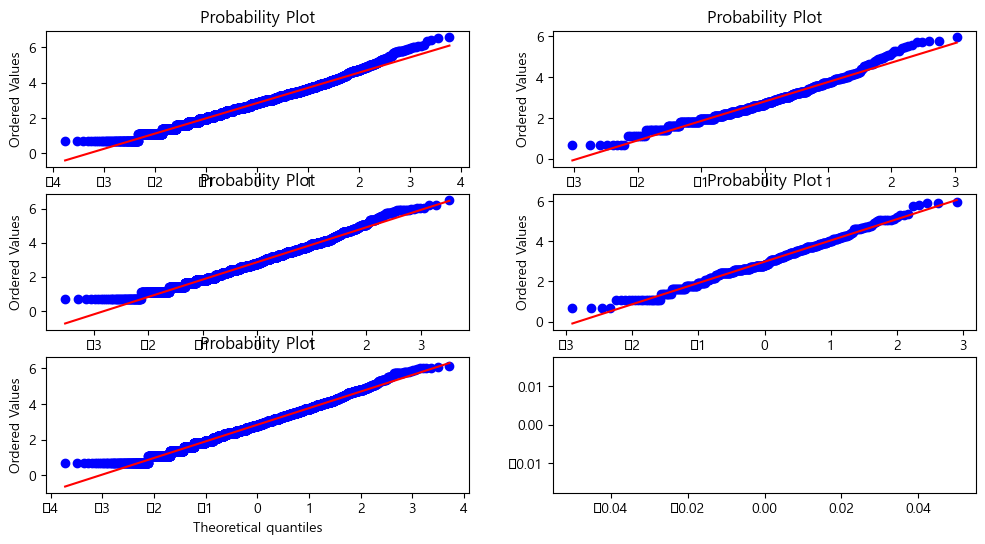

In [115]:
# 2. 종사상 지위
print_probplots('work')

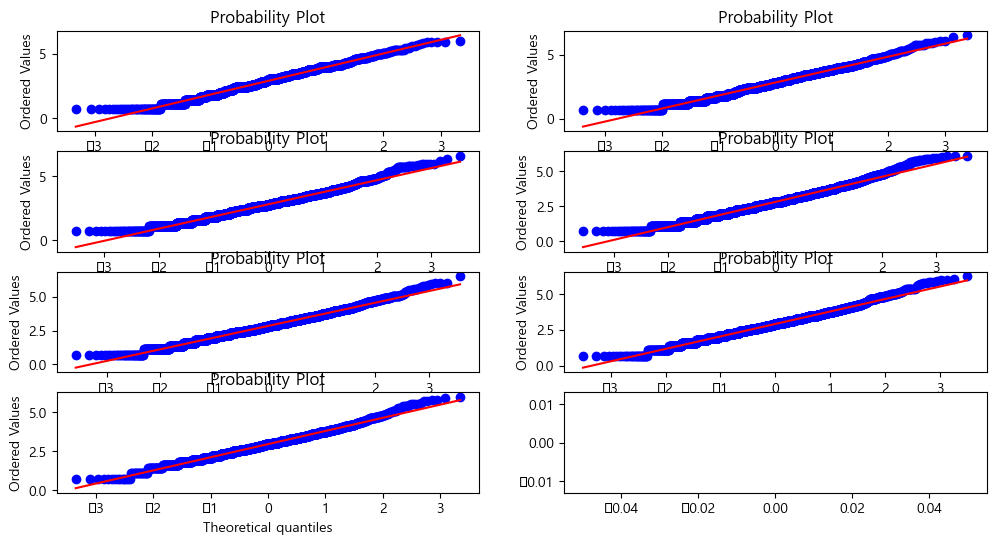

In [116]:
# 3. 가구소득
print_probplots('income')

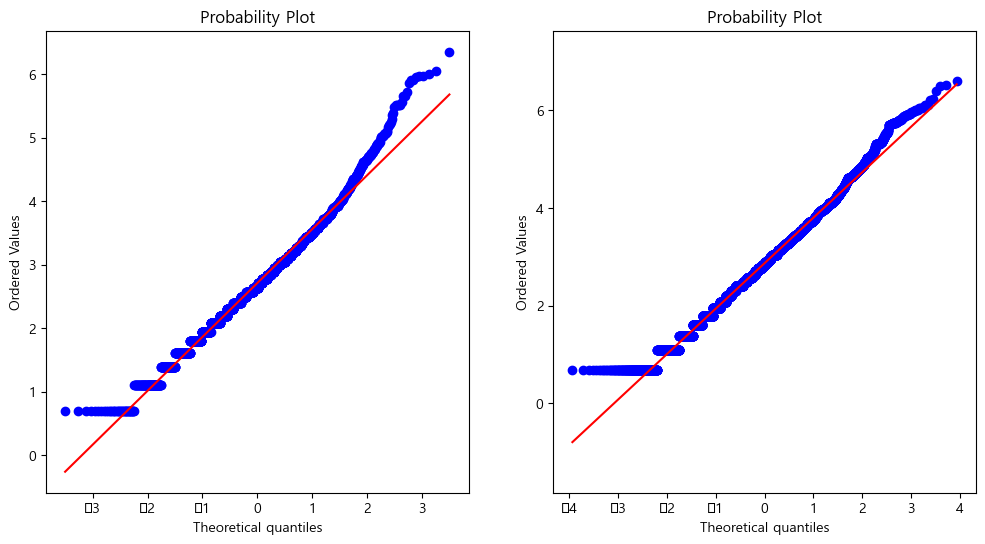

In [117]:
# 4. 거주지 (서울과 그 외)
print_probplots('sido_sudo')

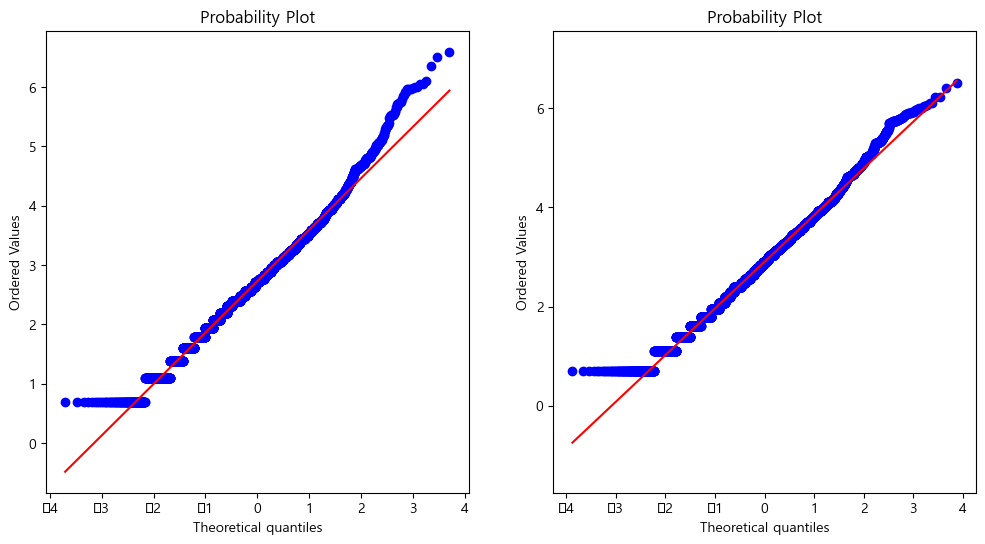

In [118]:
# 5. 거주지 (수도권)
print_probplots('sido_gyeon')

- 정규성 검정 Shapiro Test

In [119]:
def print_shapiro_result(column_name, level):
    from scipy.stats import shapiro
    
    class_count = len(CS_X[column_name].value_counts())
    
    print('\n' + column_name + '의 정규성 검정(Shapiro Test) 결과')
    for i in range(class_count):
        data = CS_y_log[CS_X[column_name] == i+1]
        shapiro_test = shapiro(data)
        print("p-value = " + str(round(shapiro_test[1], 4)) + "로 " + str(i+1) + ': 유의수준 ' + str(level) + '에서 유의함' if shapiro_test[1] < level else str(i+1) + ': 유의수준 ' + str(level) + '에서 유의하지 않음')

In [120]:
column_names = ['age', 'education', 'work', 'income', 'sido_sudo', 'sido_gyeon']
level = 0.05

for column_name in column_names:
    print_shapiro_result(column_name, level)


age의 정규성 검정(Shapiro Test) 결과
1: 유의수준 0.05에서 유의함
2: 유의수준 0.05에서 유의함
3: 유의수준 0.05에서 유의함
4: 유의수준 0.05에서 유의함

education의 정규성 검정(Shapiro Test) 결과
1: 유의수준 0.05에서 유의함
2: 유의수준 0.05에서 유의함
3: 유의수준 0.05에서 유의함
4: 유의수준 0.05에서 유의함

work의 정규성 검정(Shapiro Test) 결과
1: 유의수준 0.05에서 유의함
2: 유의수준 0.05에서 유의함
3: 유의수준 0.05에서 유의함
4: 유의수준 0.05에서 유의함
5: 유의수준 0.05에서 유의함

income의 정규성 검정(Shapiro Test) 결과
1: 유의수준 0.05에서 유의함
2: 유의수준 0.05에서 유의함
3: 유의수준 0.05에서 유의함
4: 유의수준 0.05에서 유의함
5: 유의수준 0.05에서 유의함
6: 유의수준 0.05에서 유의함
7: 유의수준 0.05에서 유의함

sido_sudo의 정규성 검정(Shapiro Test) 결과
1: 유의수준 0.05에서 유의함
2: 유의수준 0.05에서 유의함

sido_gyeon의 정규성 검정(Shapiro Test) 결과
1: 유의수준 0.05에서 유의함
2: 유의수준 0.05에서 유의함


#### 정규성 검정 결과
- 정규성을 띄지 않음
- 그러나 정규성 및 나머지 가정에 대해 만족한다고 가정 후 분석 진행

In [121]:
# 분산분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for i, column in enumerate(column_names):
    df = pd.concat([CS_X[column], CS_y], axis=1)
    
    model = ols('view_cnt ~ C(' + column + ')', df).fit()

    print("\n", column)
    print(anova_lm(model))
    
# 결론
# 유의수준 0.05에서 모든 p-value가 0.05보다 작으므로
# 학력, 종사상지위, 가구소득에 따른 문화예술행사 관람 횟수의 평균의 차이는 존재한다고 할 수 있다.
# 지역에 따른 문화예술행사 관람 횟수의 평균의 차이 또한 존재한다고 할 수 있다.


 age
               df        sum_sq      mean_sq         F    PR(>F)
C(age)        3.0  1.065072e+04  3550.240054  2.409004  0.065037
Residual  19593.0  2.887494e+07  1473.737464       NaN       NaN

 education
                   df        sum_sq       mean_sq          F        PR(>F)
C(education)      3.0  8.365744e+04  27885.813802  18.969796  2.796107e-12
Residual      19593.0  2.880193e+07   1470.011300        NaN           NaN

 work
               df        sum_sq       mean_sq         F        PR(>F)
C(work)       4.0  8.367884e+04  20919.709774  14.23027  1.335638e-11
Residual  19592.0  2.880191e+07   1470.085239       NaN           NaN

 income
                df        sum_sq      mean_sq         F    PR(>F)
C(income)      6.0  5.075449e+04  8459.082258  5.746987  0.000005
Residual   19590.0  2.883483e+07  1471.915996       NaN       NaN

 sido_sudo
                   df        sum_sq       mean_sq          F        PR(>F)
C(sido_sudo)      1.0  7.053861e+04  70538.608764  

### 사후검정
- Tuckey's HSD

In [122]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### 학력, 종사상 지위, 가구소득에 따른 평균 차이 사후검정
- 지역은 카테고리가 너무 많거나 이진분류이기 때문에 사후검정 하지 않음
- p-adj는 수정된 p-value임
    - 귀무가설이 참인 상황에서 귀무가설을 기각할 확률인 제 1종 오류를 범하지 않도록
    - 더 보수적으로 접근함

In [123]:
# 학력에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['education'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 학력이
# '초졸 이하(1)' 와 '중졸(2)/고졸(3)/대졸 이상(4)' 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.
# '중졸(2)'/'고졸(3)' 과 '대졸 이상(4)'의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-6.7247,0.0,-9.7626,-3.6867,True
1,3,-6.5039,0.0,-9.0077,-4.0,True
1,4,-3.7773,0.0007,-6.3037,-1.2509,True
2,3,0.2208,0.9949,-2.0987,2.5403,False
2,4,2.9474,0.0068,0.6036,5.2912,True
3,4,2.7266,0.0001,1.1349,4.3183,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,-6.7247,0.0000,-9.7626,-3.6867,True
1,1,3,-6.5039,0.0000,-9.0077,-4.0000,True
2,1,4,-3.7773,0.0007,-6.3037,-1.2509,True
4,2,4,2.9474,0.0068,0.6036,5.2912,True
5,3,4,2.7266,0.0001,1.1349,4.3183,True


In [124]:
# 종사상 지위에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['work'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 종사상 지위가
# '임금, 봉급 근로자(1)' 와 '고용원이 없는 자영자(3)'/'무급가족종사자(4)'
# '무직(5)'과 '고용원이 없는 자영자(3)'/'무급가족종사자(4)'
# 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2.5022,0.5629,-2.0507,7.055,False
1,3,4.8272,0.0,2.6841,6.9703,True
1,4,9.379,0.0,3.9076,14.8504,True
1,5,0.7109,0.7841,-0.9872,2.409,False
2,3,2.325,0.6722,-2.4426,7.0926,False
2,4,6.8768,0.0531,-0.0566,13.8103,False
2,5,-1.7913,0.8241,-6.3761,2.7935,False
3,4,4.5518,0.1807,-1.0995,10.2031,False
3,5,-4.1163,0.0,-6.3266,-1.9061,True
4,5,-8.6681,0.0002,-14.1662,-3.1701,True


,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,3,4.8272,0.0000,2.6841,6.9703,True
2,1,4,9.3790,0.0000,3.9076,14.8504,True
8,3,5,-4.1163,0.0000,-6.3266,-1.9061,True
9,4,5,-8.6681,0.0002,-14.1662,-3.1701,True


In [125]:
# 가구소득에 따른 평균 차이 사후검정
hsd = pairwise_tukeyhsd(CS_y, CS_X['income'], alpha=0.05)
hsd.summary()
pd.DataFrame(data=hsd._results_table.data[1:], columns=hsd._results_table.data[0])[hsd.reject]

# 유의수준 0.05에서 가구소득이
# '400-500만원(5)' 과 '600만원 이상(7)'
# 의 문화예술행사 관람 횟수의 평균 차이가 유의하다.

# 가구소득에 따른 평균 차이는 카테고리 한 개에 대해서만 차이가 존재한다.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-2.8553,0.2937,-6.677,0.9663,False
1,3,-4.0827,0.0096,-7.5589,-0.6066,True
1,4,-5.1509,0.0001,-8.5184,-1.7834,True
1,5,-6.0483,0.0,-9.4298,-2.6669,True
1,6,-3.8871,0.0192,-7.4025,-0.3717,True
1,7,-3.0647,0.249,-7.0117,0.8823,False
2,3,-1.2274,0.9204,-4.4421,1.9872,False
2,4,-2.2956,0.3032,-5.3924,0.8013,False
2,5,-3.193,0.0399,-6.3051,-0.081,True
2,6,-1.0318,0.9671,-4.2888,2.2253,False


,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,3,-4.0827,0.0096,-7.5589,-0.6066,True
2,1,4,-5.1509,0.0001,-8.5184,-1.7834,True
3,1,5,-6.0483,0.0000,-9.4298,-2.6669,True
4,1,6,-3.8871,0.0192,-7.4025,-0.3717,True
8,2,5,-3.1930,0.0399,-6.3051,-0.0810,True


### 결론
- 학력 또는 종사상 지위, 거주지에 따라 문화예술행사 참여 빈도에 차이가 존재한다.
- 특히 거주지 관점에서, 전국으로 일반화 시킨 분석 내용과
- 서울특별시로 일반화 시킨 분석 내용이 다르다는 의미이다.
- 머신러닝 모델링 시 이를 고려하지 않으면, 모델의 성능에 영향을 끼칠 수 있다.
- 가구소득에 따른 차이는 시각화 결과와 비교해 보았을 때, 가정을 만족하지 못함에 따른 오차인 것으로 보임

### 한계점
- 데이터의 분포가 0에 치우쳐 있어 제대로 된 결과를 얻지 못함